In [132]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plot
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller
import statsmodels.tsa.api as statsapi
import datetime
import matplotlib
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA
import sys
from statsmodels.tsa.arima_model import _arma_predict_out_of_sample
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
import warnings
warnings.filterwarnings('ignore')

In [2]:

def AugmentedDickeyFuller(x):   
  
    adf=adfuller(x)
    print('ADF: '+ str(adf[0]))
    print('ADF p-value: '+ str(adf[1]))
    if adf[0]<adf[4].get('5%'):
        print ('Stationary')
    else:
        print ('Not Stationary')

In [3]:

def PlotCorrelationBarChart(dataset,plot_type,nrlags=25):
    plot.subplot(1,1,1)

    if plot_type=='acf':
        lag_acf = acf(dataset, nlags=nrlags)
        plot.bar(np.arange(0,nrlags+1),lag_acf)
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plot.title('Autocorrelation Function Histogram')
        plt=plot_acf(dataset,lags=nrlags)
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plot.title('Autocorrelation Function')

    if plot_type=='pacf':
        lag_pacf = pacf(dataset, nlags=nrlags, method='ols')
        plot.bar(np.arange(0,nrlags+1),lag_pacf)
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plot.title('Partial Autocorrelation Function Histogram')
        plt=plot_pacf(dataset,lags=nrlags)
        fig = matplotlib.pyplot.gcf()
        fig.set_size_inches(18.5, 10.5) 
        plot.title('Partial Autocorrelation Function')

        
   
     



In [4]:
sales=pd.read_csv('./RETAILIMSA.csv')
data_name="Invetories of Retail Goods USA"
matplotlib.rcParams.update({'font.size': 18})


In [5]:
sales.tail(5)

,realtime_start,value,date,realtime_end
328,2019-12-06,663185,2019-05-01,2019-12-06
329,2019-12-06,662015,2019-06-01,2019-12-06
330,2019-12-06,666447,2019-07-01,2019-12-06
331,2019-12-06,665372,2019-08-01,2019-12-06
332,2019-12-06,666947,2019-09-01,2019-12-06


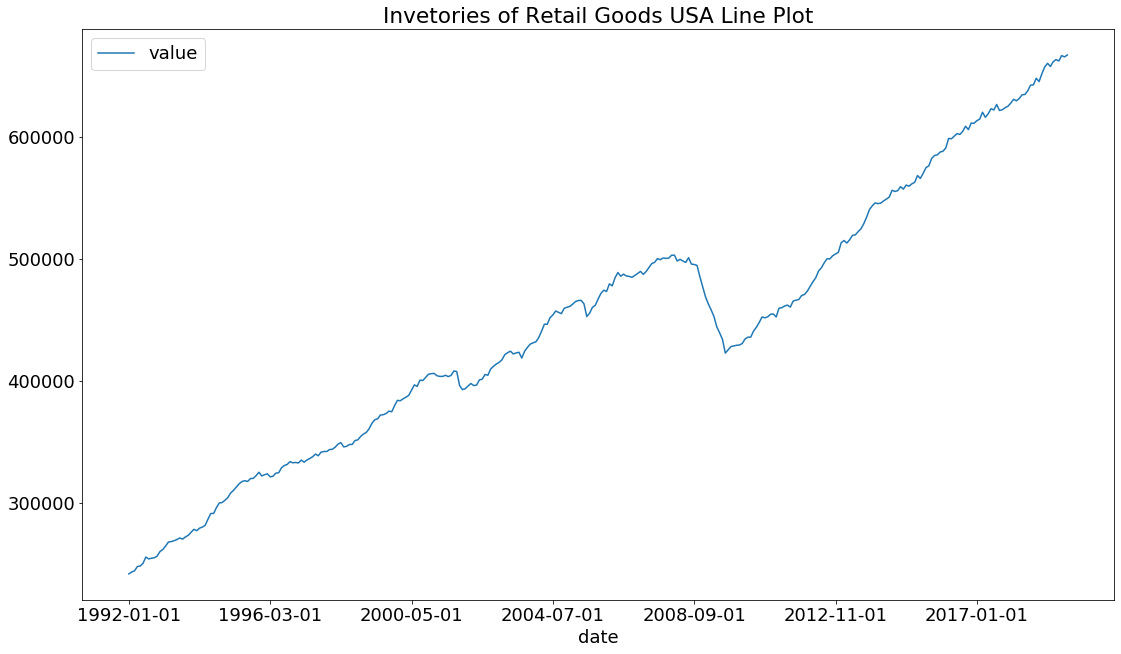

In [6]:
title=data_name+" Line Plot"
sales.plot.line(x="date",y="value", figsize=(18.5, 10.5), title=title)



Text(0.5, 1.0, 'Invetories of Retail Goods USA Histogram')

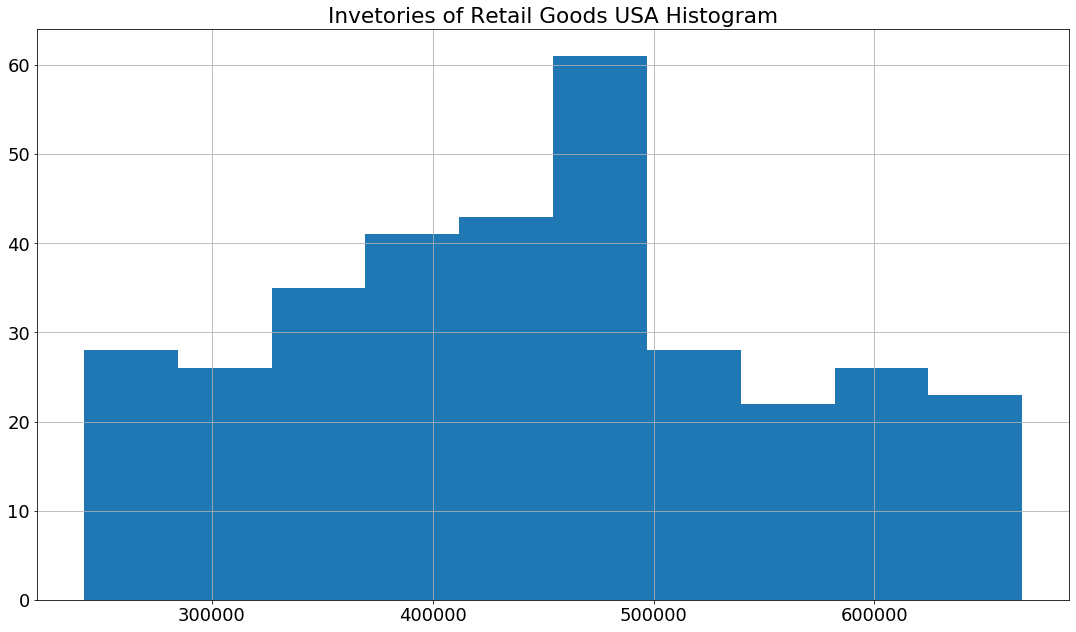

In [7]:


sales['value'].hist(figsize=(18.5, 10.5))
plot.title(data_name+" Histogram")


In [8]:
stationary=AugmentedDickeyFuller(sales['value'])


ADF: -0.21207102376770517
ADF p-value: 0.9370674047189985
Not Stationary


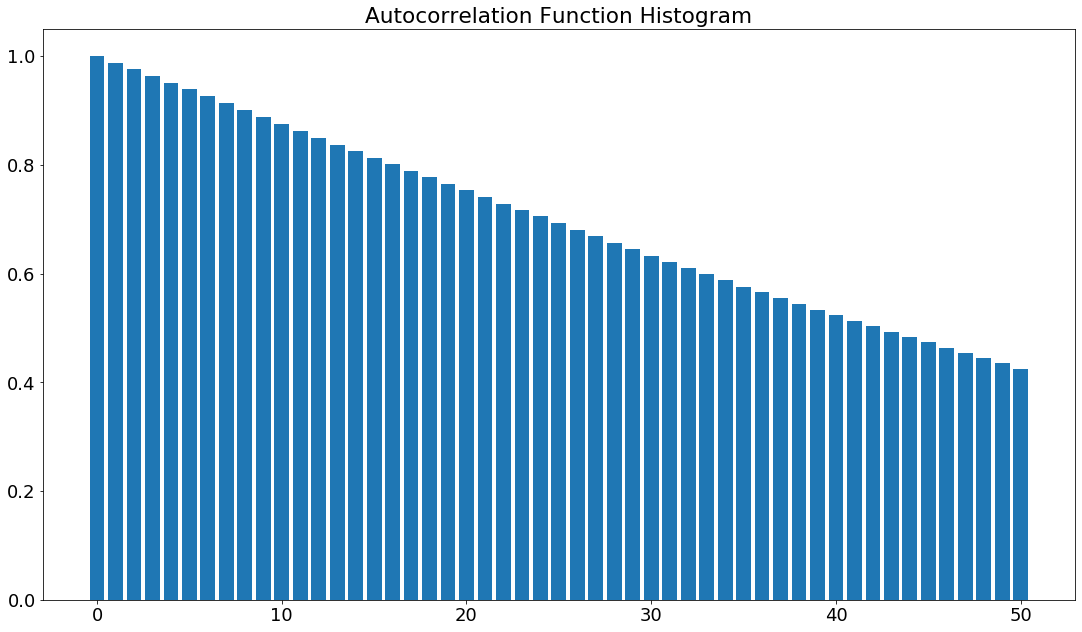

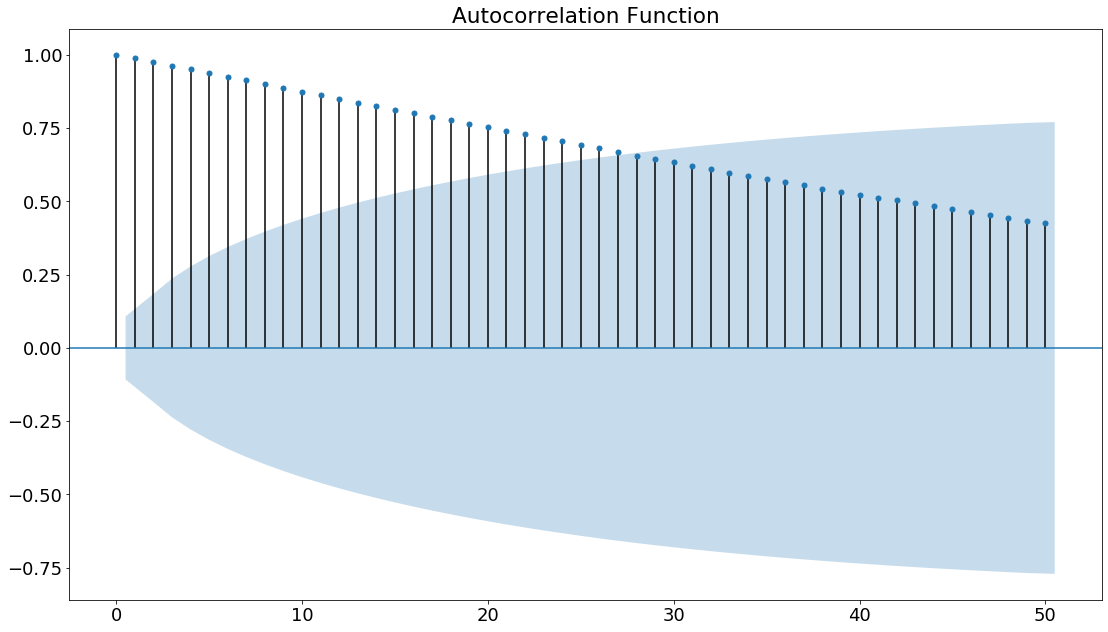

In [9]:
PlotCorrelationBarChart(sales['value'],'acf',50)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)   



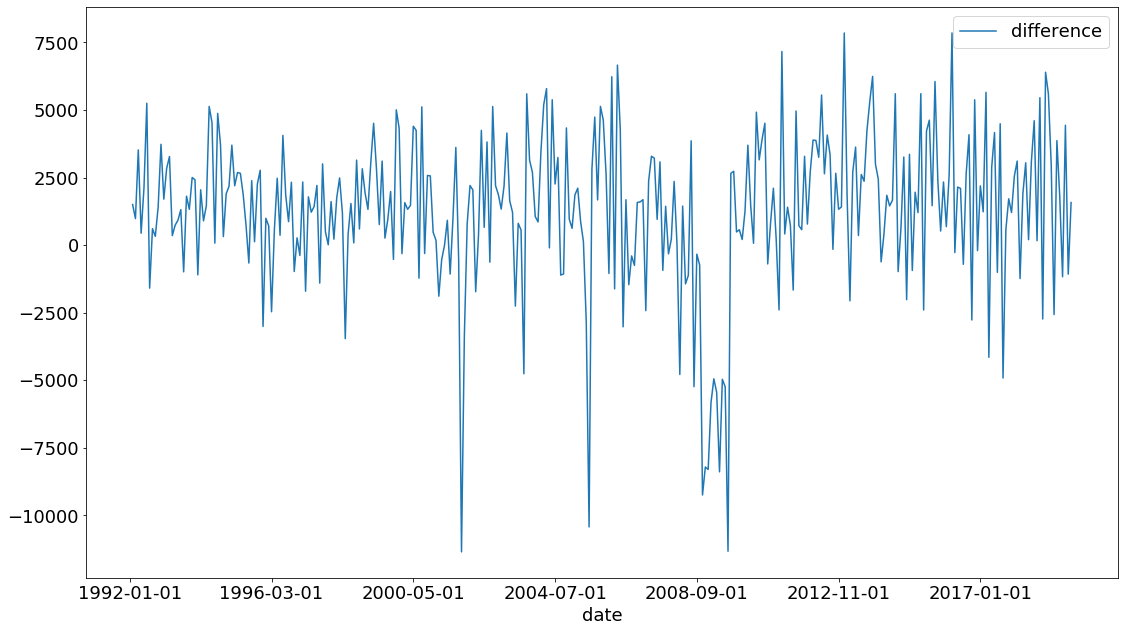

In [10]:

sales['difference']=sales['value'] - sales['value'].shift()

sales.plot.line(x="date",y="difference", figsize=(18.5, 10.5))
sales['difference'][0]=0





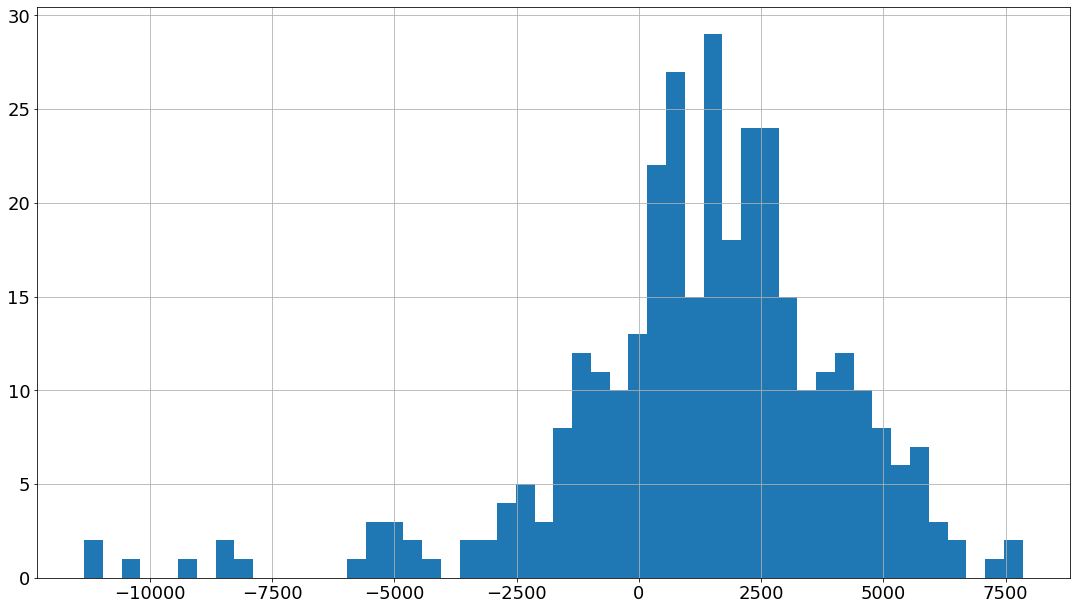

In [11]:
sales['difference'].hist(bins=50,figsize=(18.5, 10.5))

In [12]:
stationary2=AugmentedDickeyFuller(sales['difference'])

ADF: -3.2471644444199117
ADF p-value: 0.017411867129275213
Stationary


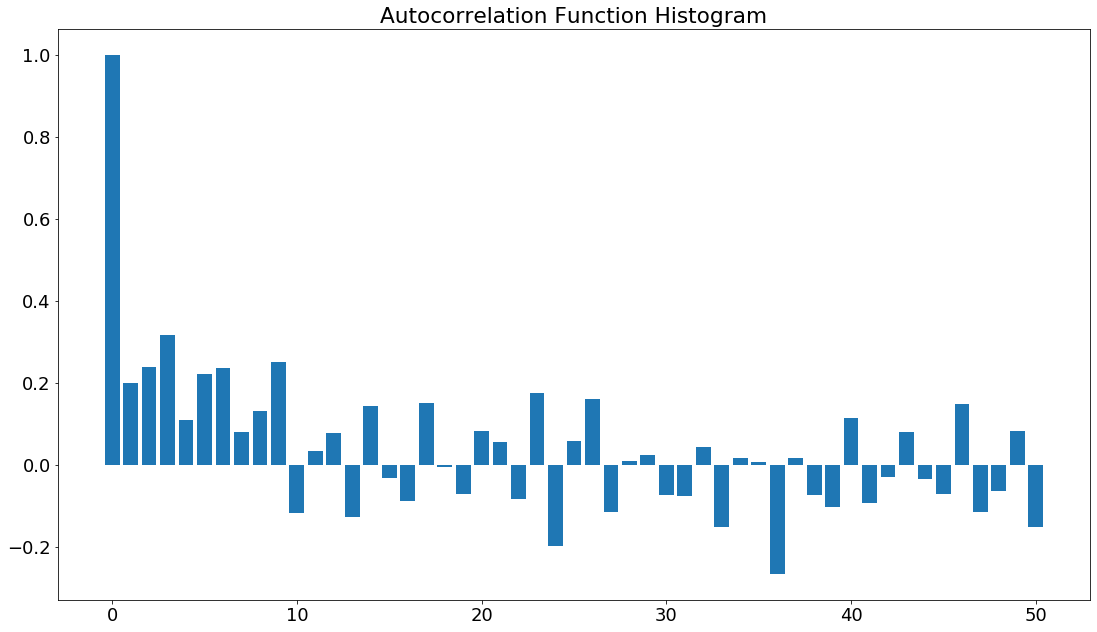

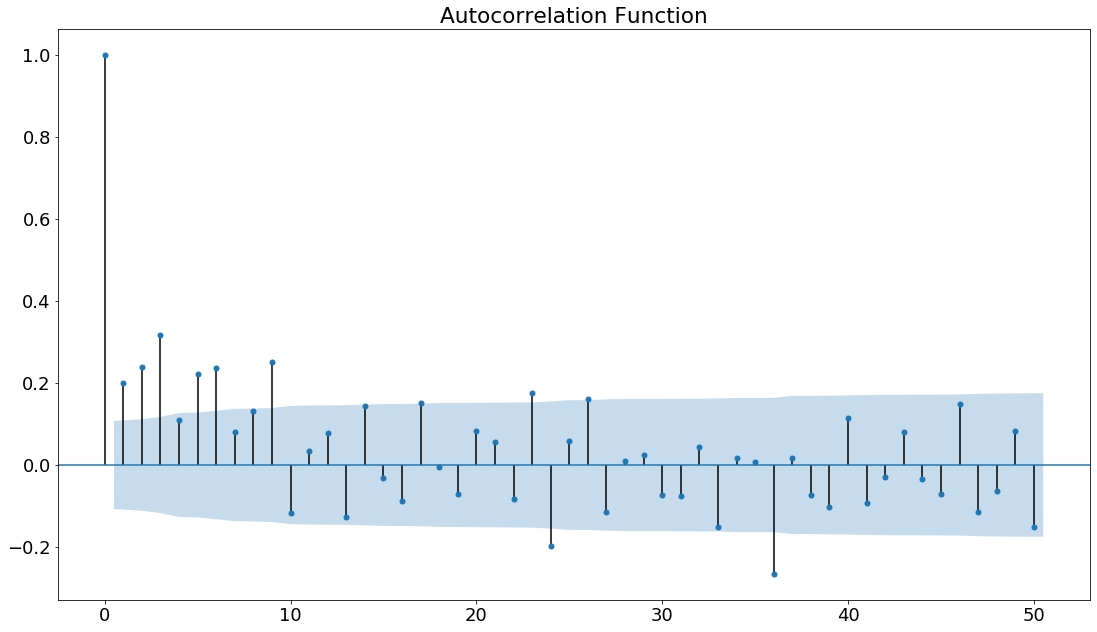

In [13]:
PlotCorrelationBarChart(sales['difference'],'acf',50)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

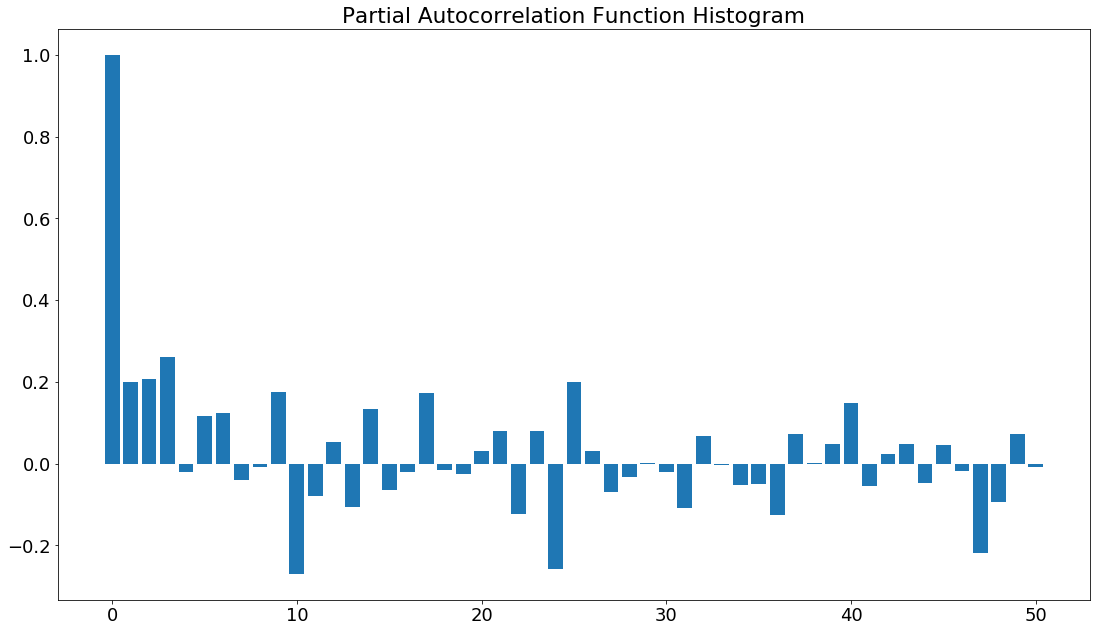

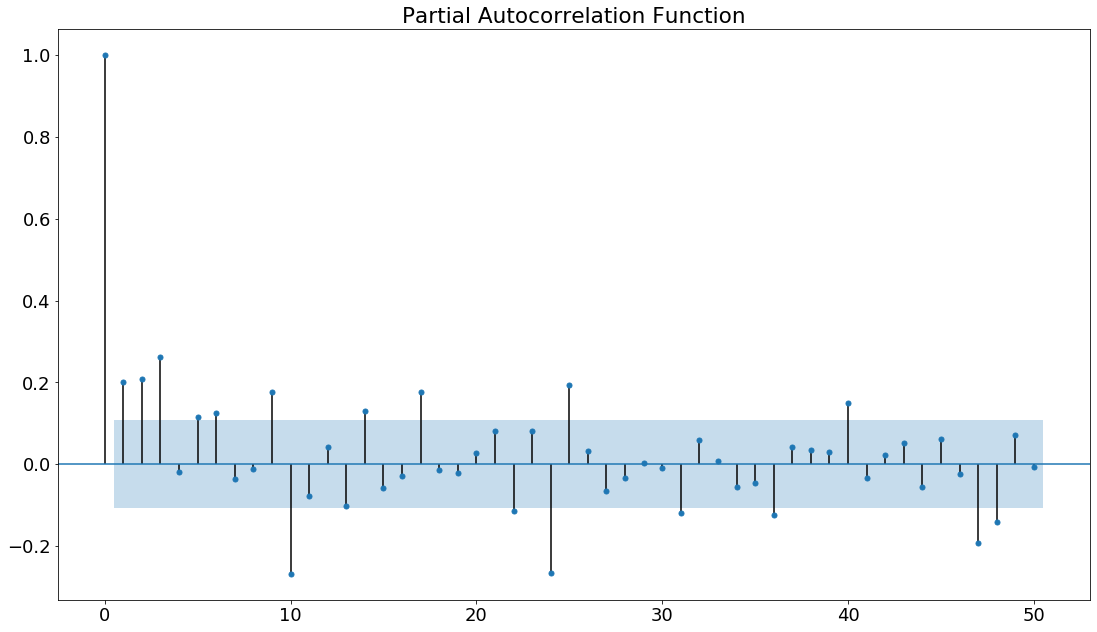

In [14]:
PlotCorrelationBarChart(sales['difference'],'pacf',50)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

In [15]:

model33=ARMA(sales['difference'], (3,3)).fit()
print('ARMA(3,3) AIC: ' + str(model33.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model33.predict(0))) )
model36=ARMA(sales['difference'], (3,6)).fit()
print('ARMA(3,6) AIC: ' + str(model36.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model36.predict(0))) )
model35=ARMA(sales['difference'], (3,5)).fit()
print('ARMA(3,5) AIC: ' + str(model35.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model35.predict(0))) )
model63=ARMA(sales['difference'], (6,3)).fit()
print('ARMA(6,3) AIC: ' + str(model63.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model63.predict(0))) )
model93=ARMA(sales['difference'], (9,3)).fit()
print('ARMA(9,3) AIC: ' + str(model93.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model93.predict(0))) )
model95=ARMA(sales['difference'], (9,5)).fit()
print('ARMA(9,5) AIC: ' + str(model95.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model95.predict(0))) )
model96=ARMA(sales['difference'], (9,6)).fit()
print('ARMA(9,6) AIC: ' + str(model96.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model96.predict(0))) )
model103=ARMA(sales['difference'], (10,3)).fit()
print('ARMA(10,3) AIC: ' + str(model103.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model103.predict(0)))) 
model173=ARMA(sales['difference'], (17,3)).fit()
print('ARMA(17,3) AIC: ' + str(model173.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model173.predict(0))))
model175=ARMA(sales['difference'], (17,5)).fit()
print('ARMA(17,5) AIC: ' + str(model175.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model175.predict(0))))
model106=ARMA(sales['difference'], (10,6)).fit()
print('ARMA(10,6) AIC: ' + str(model106.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model106.predict(0))) )
model176=ARMA(sales['difference'], (17,6)).fit()
print('ARMA(17,6) AIC: ' + str(model176.aic) +' and MSE: '+str(mean_squared_error(sales['difference'], model176.predict(0))) )     
      


ARMA(3,3) AIC: 6183.956249120753 and MSE: 6109522.430951734
ARMA(3,6) AIC: 6182.920199291277 and MSE: 5998324.976543957
ARMA(3,5) AIC: 6187.265248990527 and MSE: 6102501.961730984
ARMA(6,3) AIC: 6181.55792386465 and MSE: 5967991.577993911
ARMA(9,3) AIC: 6160.843306633395 and MSE: 5781342.149809838
ARMA(9,5) AIC: 6155.982170809542 and MSE: 5621486.359902226
ARMA(9,6) AIC: 6165.159924323799 and MSE: 5748218.553808561
ARMA(10,3) AIC: 6179.514822823315 and MSE: 5793485.015317645
ARMA(17,3) AIC: 6172.188777961698 and MSE: 5503874.785395178
ARMA(17,5) AIC: 6188.000587705532 and MSE: 5679279.919675361
ARMA(10,6) AIC: 6171.757783817531 and MSE: 5649333.062995032
ARMA(17,6) AIC: 6160.598784675161 and MSE: 5402939.86494659


In [16]:
prediction=model95.predict(0)

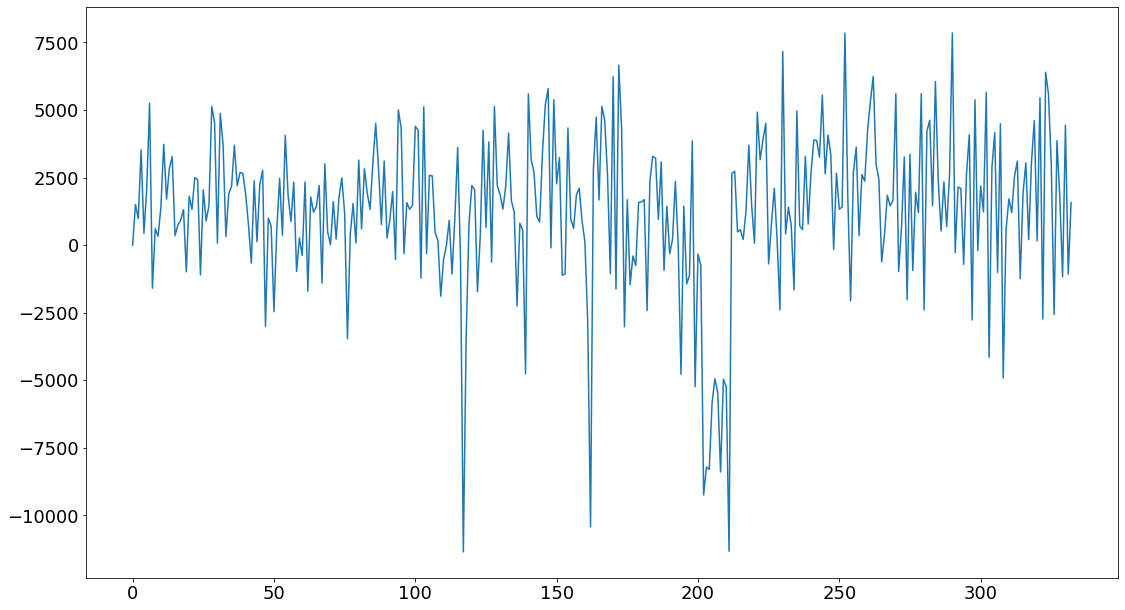

In [17]:
sales['difference'].plot.line(x="date",y="value", figsize=(18.5, 10.5))


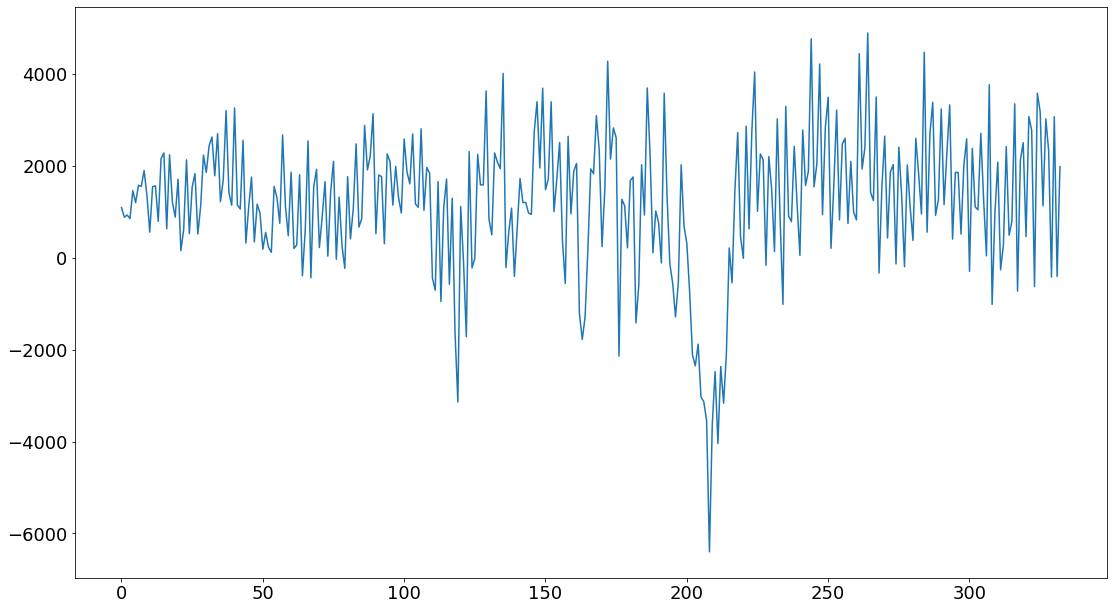

In [18]:
prediction.plot.line(figsize=(18.5, 10.5))

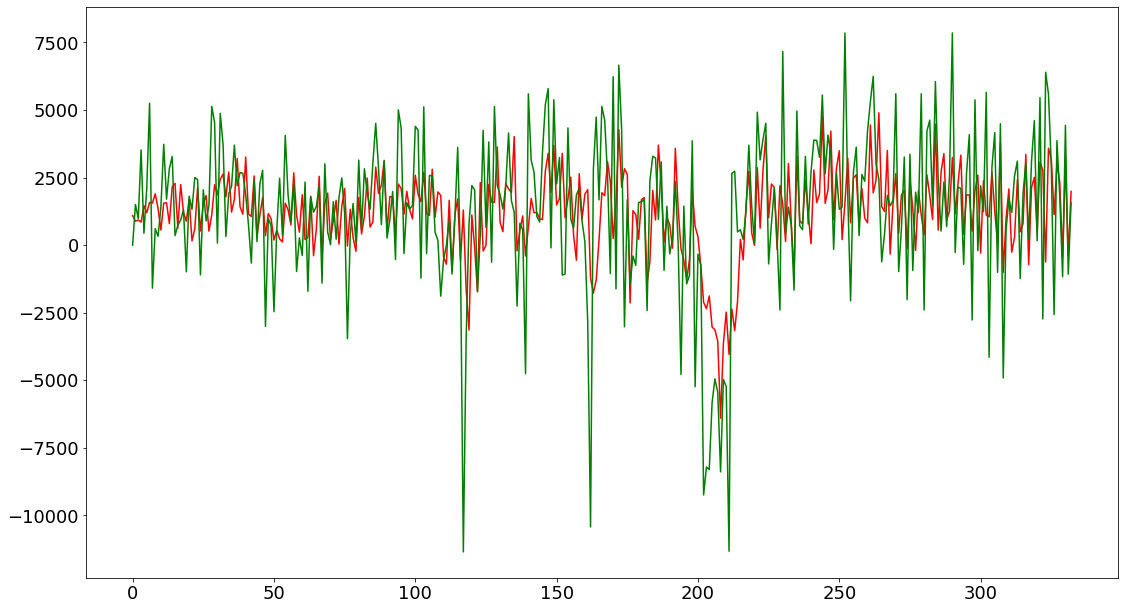

In [19]:
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plot.plot( prediction, 'r')
plot.plot( sales['difference'], 'g')


In [20]:
prediction_values=sales.copy()
prediction_values['value'][0]=sales['value'][0]
prediction_values['value'][1:]=0

i=1;
while i<len(prediction_values['value']):
    
    prediction_values['value'][i]=prediction_values['value'][i-1]+prediction[i]
    i=i+1

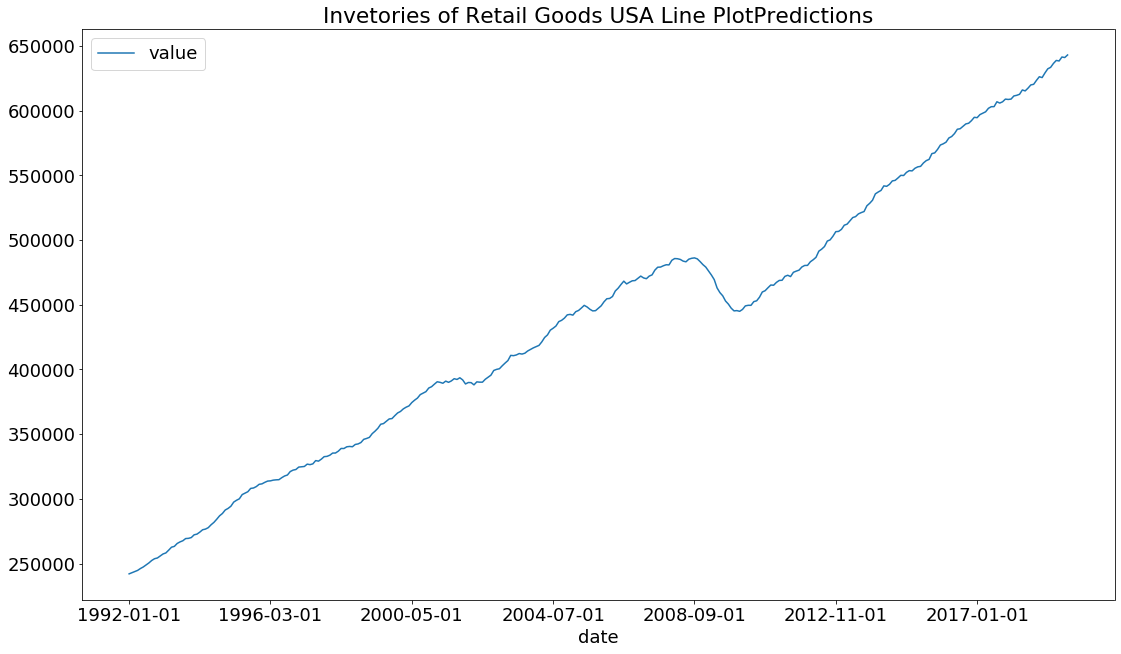

In [21]:
prediction_values.plot.line(x="date",y="value", figsize=(18.5, 10.5), title=title+ 'Predictions')


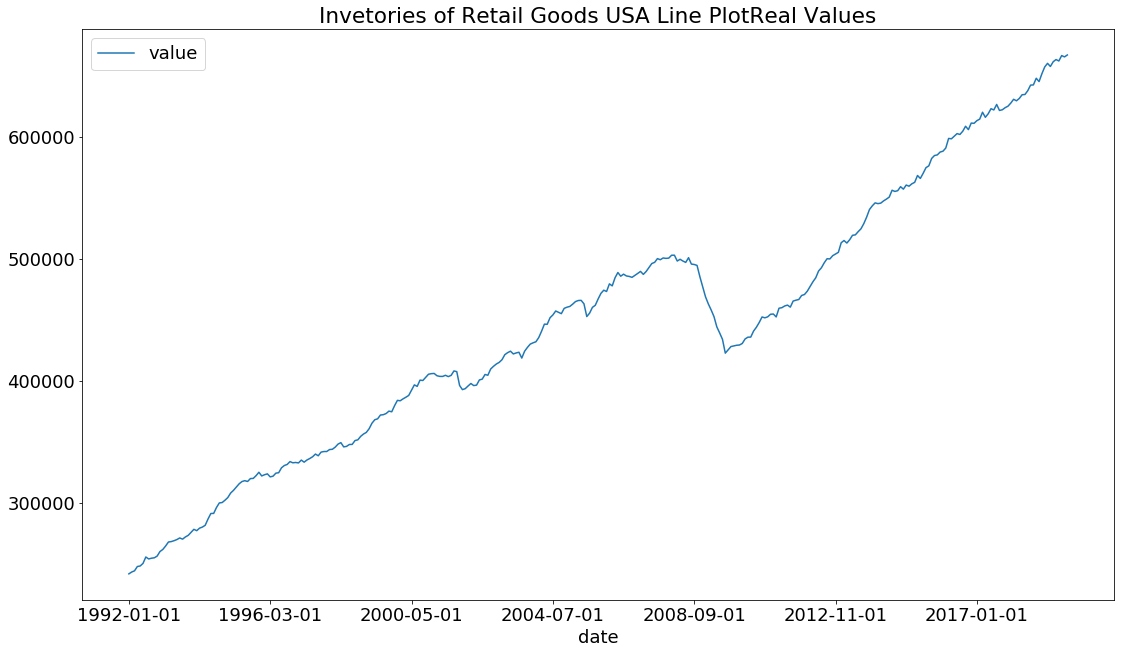

In [22]:
sales.plot.line(x="date",y="value", figsize=(18.5, 10.5), title=title +'Real Values')


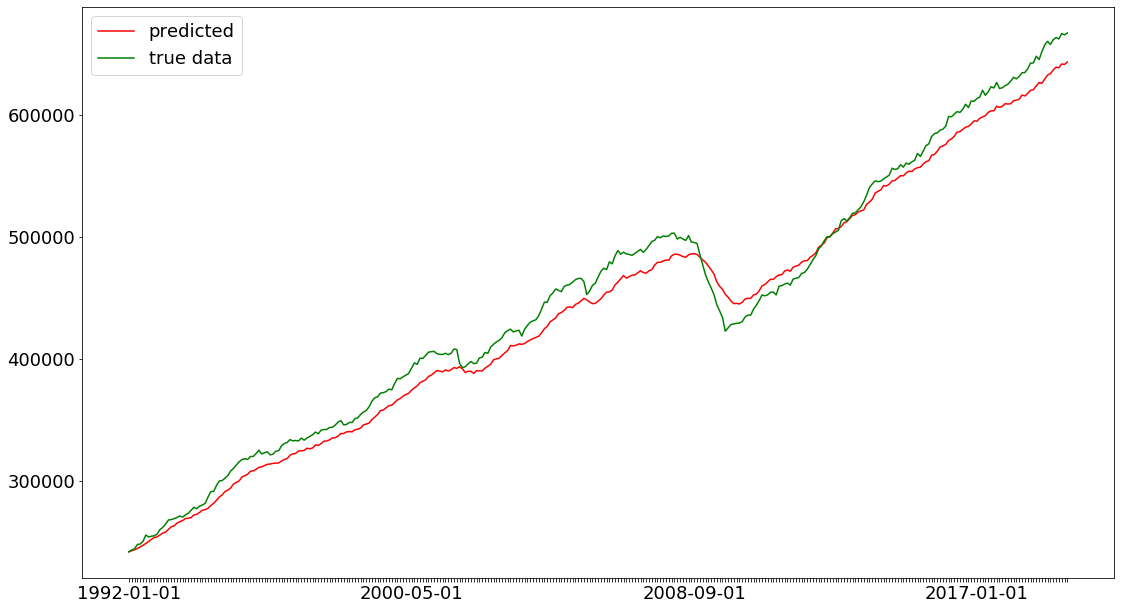

In [23]:

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

plot.plot(prediction_values['date'], prediction_values['value'], 'r',label='predicted')
plot.plot(sales['date'], sales['value'], 'g', label='true data')
plot.legend(loc="upper left")

ax = plot.gca()
ticks = ax.xaxis.get_ticklabels()
ticks = list(set(ticks) - set(ticks[::100]))
for tick in ticks:
    tick.set_visible(False)

In [24]:
steps_prediction=20
results=_arma_predict_out_of_sample(model95.params, steps_prediction, model95.resid, 9, 5, model95.k_trend, model95.k_exog, endog=sales['difference'], exog=None, start=len(sales['difference']))
future_steps=results.copy()
future_steps[0]=sales['value'][len(sales['value'])-1]+results[0]
i=1;
while i<steps_prediction:
    
    future_steps[i]=future_steps[i-1]+prediction[i]
    i=i+1
    


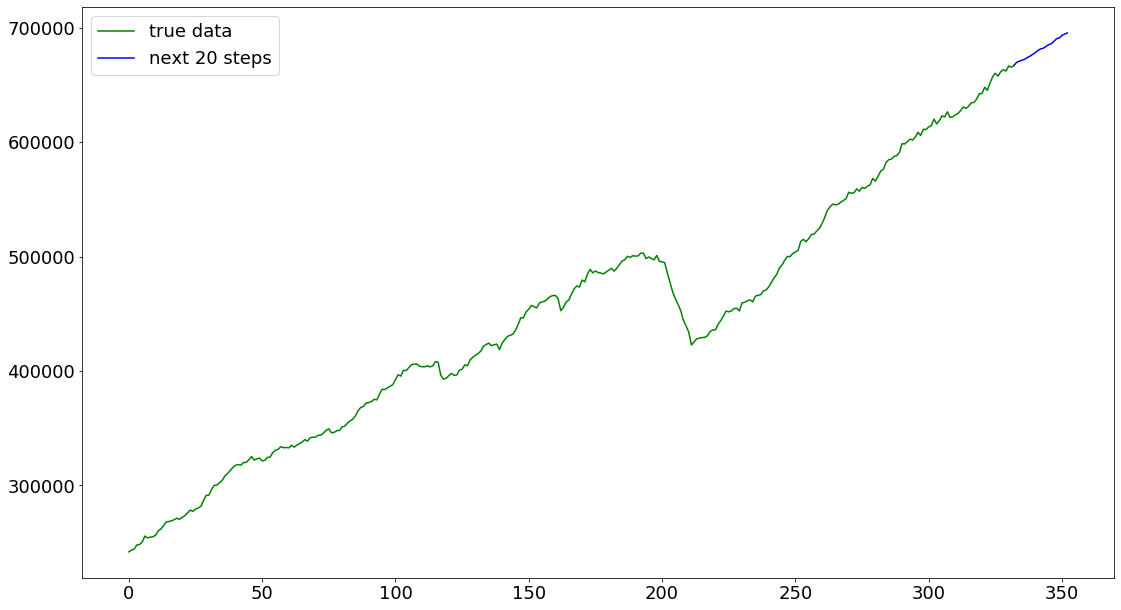

In [25]:
starting_index=len(sales['value'])-1
ending_index=len(sales['value'])+steps_prediction
last_value=sales['value'][len(sales)-1]
plot.plot( sales['value'], 'g', label='true data')
plot.plot(range(starting_index,ending_index),np.insert(future_steps,0, last_value,axis=0),'b', label='next 20 steps')

plot.legend(loc="upper left")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)

# Two-Way Anova

In [26]:
import scipy.stats as scipystats
from sklearn.preprocessing import LabelEncoder
from statsmodels.formula.api import ols
import statsmodels.api as statsapi
import seaborn as sns

from scipy import stats
two_way_anova_ds=pd.read_csv('./student_performance.csv')
two_way_anova_ds.head(100)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
95,male,group C,associate's degree,free/reduced,completed,78,81,82
96,male,group B,some high school,standard,completed,65,66,62
97,female,group E,some college,standard,completed,63,72,70
98,female,group D,some college,free/reduced,none,58,67,62


In [27]:


dataset_used=two_way_anova_ds[['test preparation course','parental level of education','reading score']]


dataset_used.dropna(inplace=True)
dataset_used.rename(columns={"parental level of education": "Education", "test preparation course": "Preparation", "reading score":"Score"}, inplace=True)
len(dataset_used)

1000

In [28]:
dataset_used['Education'].unique()


array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [29]:
dataset_used['Preparation'].unique()

array(['none', 'completed'], dtype=object)

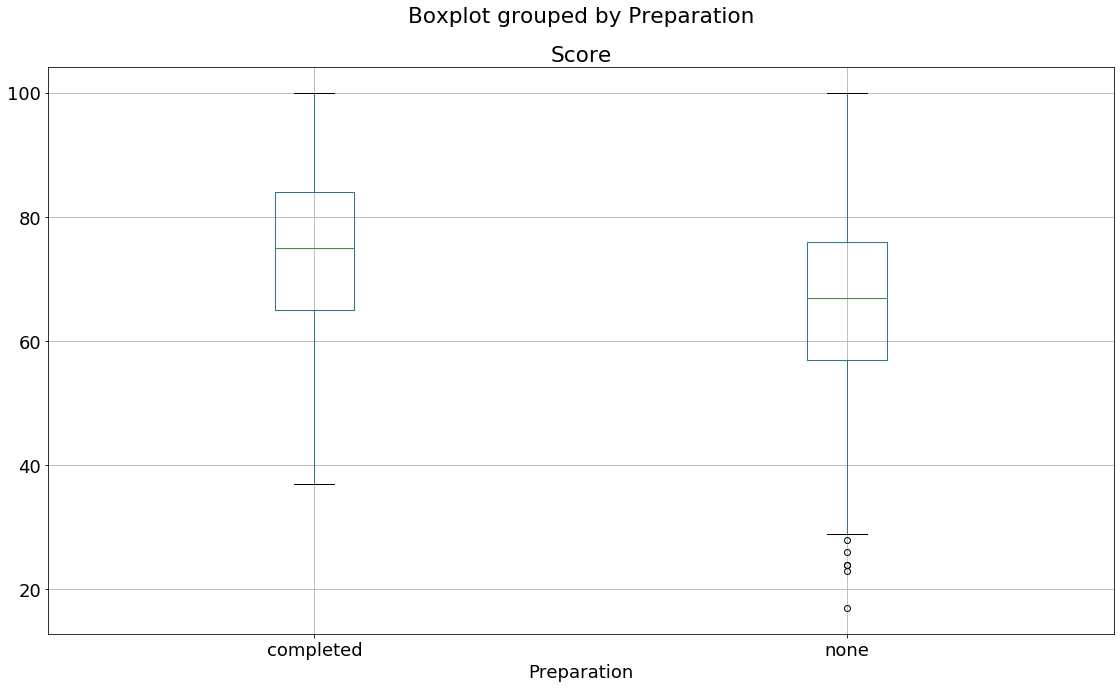

In [30]:
dataset_used.boxplot(column='Score', by='Preparation')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


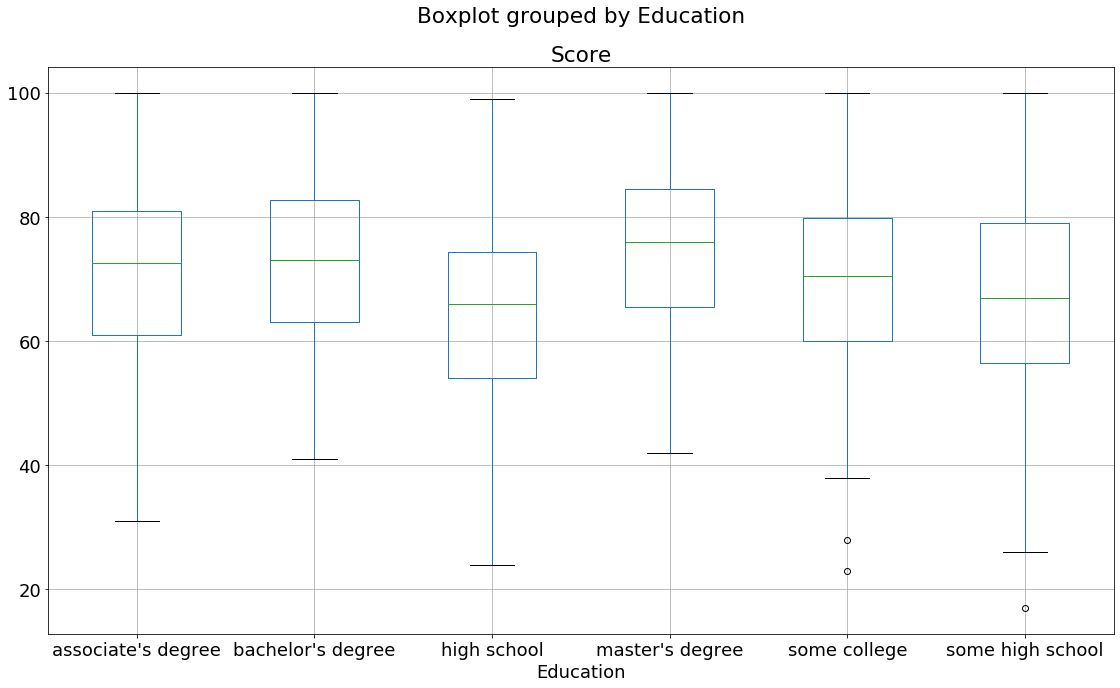

In [31]:
dataset_used.boxplot(column='Score', by='Education')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


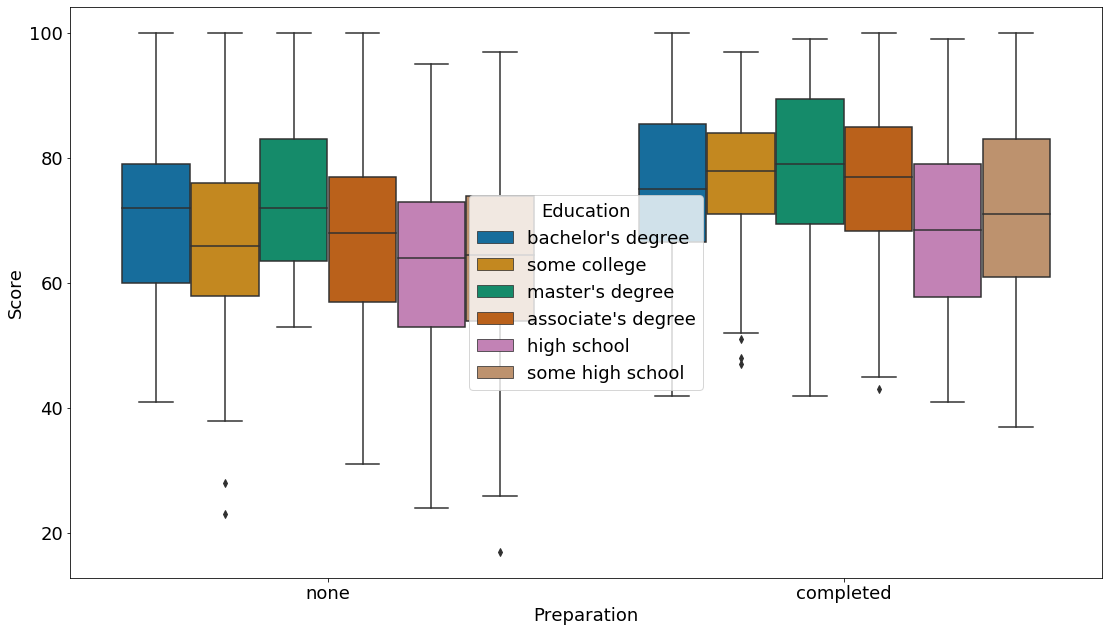

In [32]:
sns.boxplot(y='Score', x='Preparation', 
                 data=dataset_used, 
                 palette="colorblind",
                 hue='Education')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


In [33]:
array_for_variance=[]
for edu in dataset_used['Education'].unique():
    edu_array=[]
    result= dataset_used.loc[dataset_used['Education']==edu,['Score']]
    edu_array=result.iloc[:,0].values
    array_for_variance.append(edu_array)



print("Bartlett Result Education: "+str( scipystats.bartlett(*array_for_variance)))


array_for_variance2=[]
for prep in dataset_used['Preparation'].unique():
    prep_array=[]
    result= dataset_used.loc[dataset_used['Preparation']==prep,['Score']]
    prep_array=result.iloc[:,0].values
    array_for_variance2.append(prep_array)

print("Bartlett Result Preparation: "+str( scipystats.bartlett(*array_for_variance2)))




array_for_variance3=[]
for prep in dataset_used['Preparation'].unique():
    for edu in dataset_used['Education'].unique():

        combination_array=[]
        result= dataset_used.loc[(dataset_used['Preparation']==prep) & (dataset_used['Education']==edu),['Score']]
        combination_array=result.iloc[:,0].values
        array_for_variance3.append(combination_array)


print("Bartlett Result Education/Preparation: "+str(scipystats.bartlett(*array_for_variance3)))




Bartlett Result Education: BartlettResult(statistic=3.0976756774968837, pvalue=0.6849300940982319)
Bartlett Result Preparation: BartlettResult(statistic=1.56368072820013, pvalue=0.21112710367802134)
Bartlett Result Education/Preparation: BartlettResult(statistic=8.842167310824923, pvalue=0.6364583306471192)


Education
(0.9822501540184021, 0.12170372158288956)
(0.9870172739028931, 0.037750352174043655)
(0.9788912534713745, 0.39467769861221313)
(0.9903920292854309, 0.14837950468063354)
(0.9903817772865295, 0.21488913893699646)
(0.9853407144546509, 0.05821014195680618)
Preparation
(0.9943283796310425, 0.01704178936779499)
(0.9856323003768921, 0.0012624554801732302)
Combinations
(0.988106906414032, 0.7354951500892639)
(0.9869090914726257, 0.17343468964099884)
(0.964422881603241, 0.2496754676103592)
(0.9913662672042847, 0.5489320158958435)
(0.9869223237037659, 0.20754046738147736)
(0.9836798310279846, 0.24227218329906464)
(0.9678938984870911, 0.2309613823890686)
(0.9660996794700623, 0.0376996174454689)
(0.9591770172119141, 0.5275418758392334)
(0.9810401201248169, 0.26679471135139465)
(0.9770840406417847, 0.36192843317985535)
(0.9831076860427856, 0.39933815598487854)


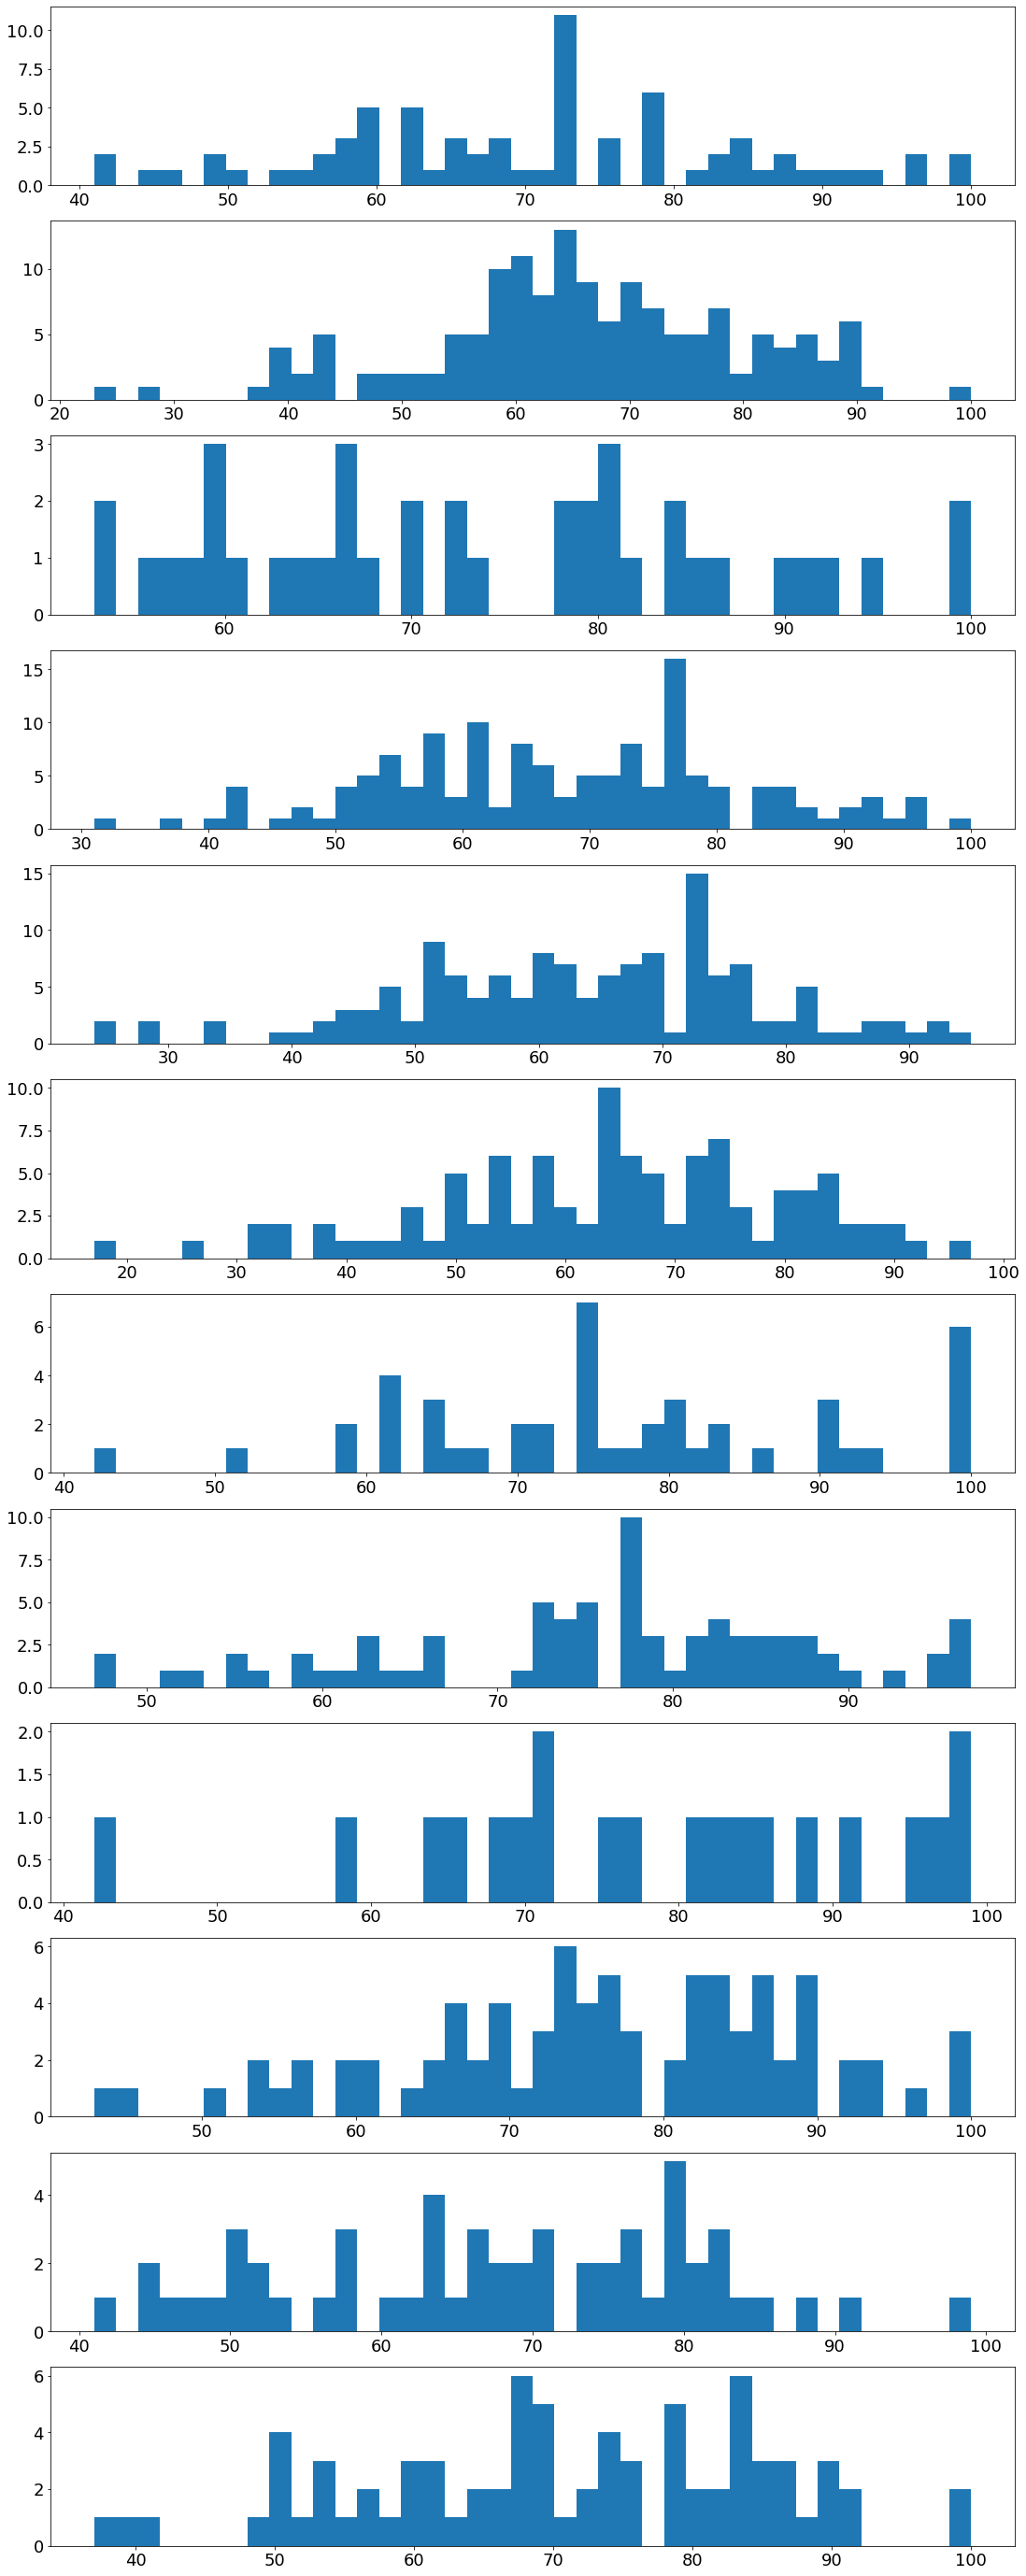

In [83]:
fig, axes = plot.subplots(nrows=12, figsize=(18.5, 50))
i=0
print("Education")
for distributions in array_for_variance:
    print(stats.shapiro(distributions))
    
print("Preparation")

for distributions in array_for_variance2:
    print(stats.shapiro(distributions))
    
print("Combinations")
for distributions in array_for_variance3:
    print(stats.shapiro(distributions))
    axes[i].hist(distributions, bins=40)
    i=i+1

In [84]:
ols_model = ols('Score ~ C(Preparation)*C(Education)',
              data=dataset_used).fit()


In [85]:
table = statsapi.stats.anova_lm(ols_model, typ=2) 
print(table)

                                    sum_sq     df          F        PR(>F)
C(Preparation)                11906.286091    1.0  61.701886  1.038513e-14
C(Education)                   8964.052870    5.0   9.290873  1.167563e-08
C(Preparation):C(Education)     890.532237    5.0   0.923000  4.651394e-01
Residual                     190649.127480  988.0        NaN           NaN


# Linear Model


In [86]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split


linear_regression_dataset=pd.read_csv('./countries of the world.csv',thousands=',')

print(linear_regression_dataset.columns.values)


['Country' 'Region' 'Population' 'Area (sq. mi.)'
 'Pop. Density (per sq. mi.)' 'Coastline (coast/area ratio)'
 'Net migration' 'Infant mortality (per 1000 births)' 'GDP ($ per capita)'
 'Literacy (%)' 'Phones (per 1000)' 'Arable (%)' 'Crops (%)' 'Other (%)'
 'Climate' 'Birthrate' 'Deathrate' 'Agriculture' 'Industry' 'Service']


In [87]:
r2_train_array=[]
r2_test_array=[]
mse_train_array=[]
mse_test_array=[]
linear_regression_dataset.rename(columns={"GDP ($ per capita)": "GDP"},inplace=True)

In [88]:


linear_regression_dataset = linear_regression_dataset.replace(r'^\s*$', np.nan, regex=True)
linear_regression_dataset.isna().sum()
unique_regions=linear_regression_dataset['Region'].unique()
print(unique_regions)

['ASIA (EX. NEAR EAST)         ' 'EASTERN EUROPE                     '
 'NORTHERN AFRICA                    '
 'OCEANIA                            '
 'WESTERN EUROPE                     '
 'SUB-SAHARAN AFRICA                 ' 'LATIN AMER. & CARIB    '
 'C.W. OF IND. STATES ' 'NEAR EAST                          '
 'NORTHERN AMERICA                   '
 'BALTICS                            ']


In [89]:

linear_regression_dataset.dropna(inplace=True)
linear_regression_dataset.tail(50)
len(linear_regression_dataset)


179

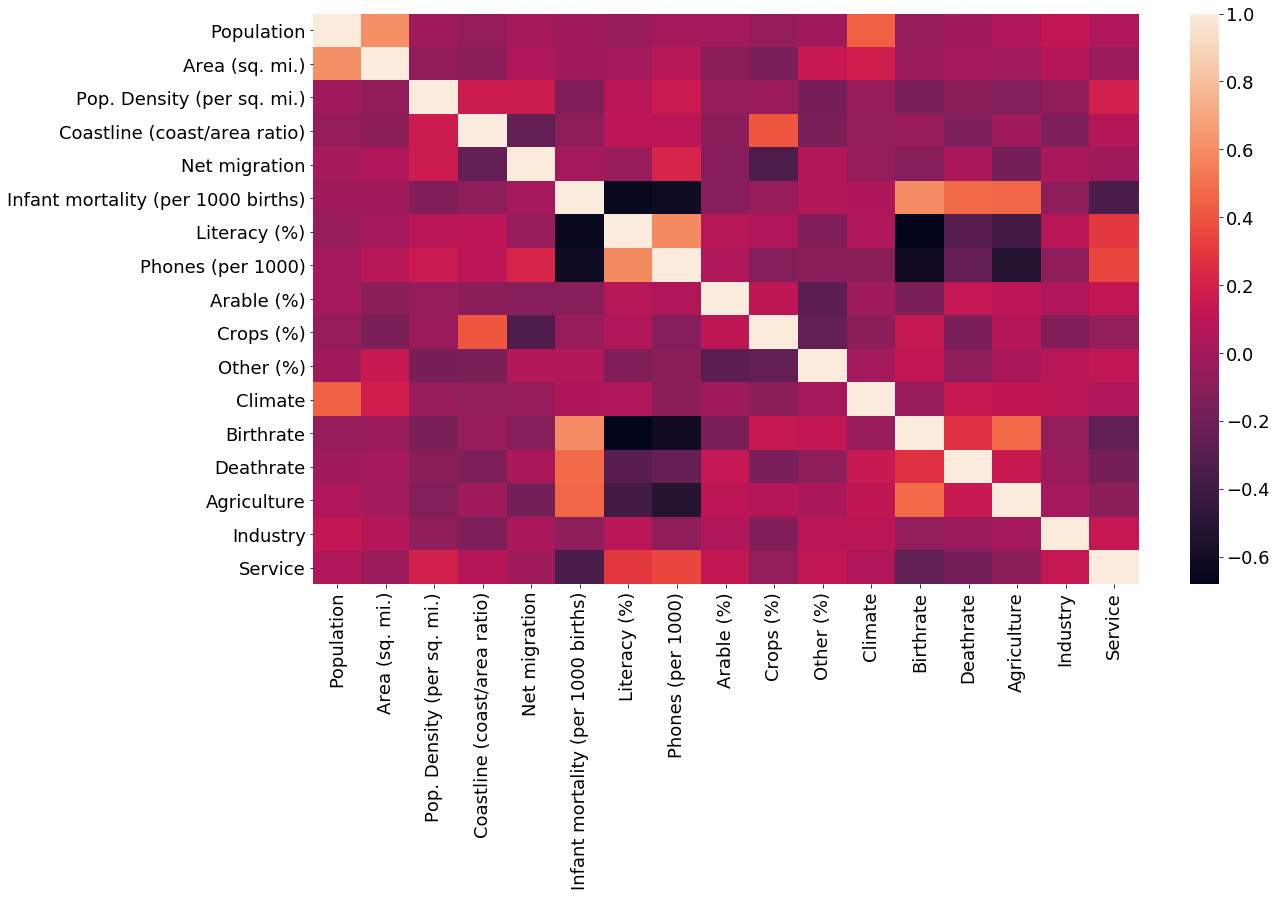

In [90]:
correlation = linear_regression_dataset[['Region','Population' ,'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
'Net migration', 'Infant mortality (per 1000 births)' ,'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)' ,'Other (%)',
 'Climate', 'Birthrate' ,'Deathrate', 'Agriculture' ,'Industry' ,'Service']].corr()

sns.heatmap(correlation, 
        xticklabels=correlation.columns,
        yticklabels=correlation.columns)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)   
plot.show()

In [91]:
X = linear_regression_dataset[['Region','Population' ,'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'Coastline (coast/area ratio)',
'Net migration', 'Infant mortality (per 1000 births)' ,'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)' ,'Other (%)',
 'Climate', 'Birthrate' ,'Deathrate', 'Agriculture' ,'Industry' ,'Service']]
one_hot = pd.get_dummies(X['Region'])
X=sm.add_constant(X)
X = X.drop('Region',axis = 1)
X = X.join(one_hot)
y = linear_regression_dataset['GDP']
X.head()

,const,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),Literacy (%),Phones (per 1000),Arable (%),...,BALTICS,C.W. OF IND. STATES,EASTERN EUROPE,LATIN AMER. & CARIB,NEAR EAST,NORTHERN AFRICA,NORTHERN AMERICA,OCEANIA,SUB-SAHARAN AFRICA,WESTERN EUROPE
0,1.0,31056997,647500,480,0,2306.0,16307.0,360.0,32.0,1213.0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,3581655,28748,1246,126,-493.0,2152.0,865.0,712.0,2109.0,...,0,0,1,0,0,0,0,0,0,0
2,1.0,32930091,2381740,138,4,-39.0,31.0,700.0,781.0,322.0,...,0,0,0,0,0,1,0,0,0,0
6,1.0,13477,102,1321,5980,1076.0,2103.0,950.0,4600.0,0.0,...,0,0,0,1,0,0,0,0,0,0
7,1.0,69108,443,1560,3454,-615.0,1946.0,890.0,5499.0,1818.0,...,0,0,0,1,0,0,0,0,0,0


In [92]:
def PrintIndicators(model, X_test,X_train, y_test, y_train):
    
    predictions = model.predict(X_test)
    predictions_train=model.predict(X_train)
    r2_test = r2_score(y_test, predictions)
    r2_test_array.append(r2_test)
    r2_train = r2_score(y_train, predictions_train)
    r2_train_array.append(r2_train)
    mse_train=mean_squared_error(y_train, predictions_train)
    mse_test=mean_squared_error(y_test, predictions)
    mse_train_array.append(mse_train)
    mse_test_array.append(mse_test)
    print('R2 Train '+str(r2_train))
    print('R2 Test '+str(r2_test))
    print('MSE Train '+str(mse_train))
    print('MSE Test '+str(mse_test))

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.20, random_state=93)
model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     47.07
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           5.45e-50
Time:                        13:54:57   Log-Likelihood:                -1336.5
No. Observations:                 143   AIC:                             2729.
Df Residuals:                     115   BIC:                             2812.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -302.8476   2499.107     -0.121      0.904   -5253.098    4647.403
Population                          -4.573e-06   3.12e-06     -1.467      0.145   -1.07e-05     1.6e-06
Area (sq. mi.)                      -2.828e-06      0.000     -0.011      0.991      -0.001       0.001
Pop. Density (per sq. mi.)              0.0521      0.022      2.394      0.018       0.009       0.095
Coastline (coast/area ratio)           -0.1954      0.085     -2.313      0.023      -0.363      -0.028
Net migration                           3.1630      0.705      4.484      0.000       1.766       4.560
Infant mortality (per 1000 births)     -0.0410      0.123     -0.333      0.740      -0.285       0.203
Literacy (%)                            6.0339      2.316      2.605      0.010       1.446      10.622
Phones (per 1000)                       2.6511      0.263     10.089      0.000       2.131       3.172
Arable (%)                             -0.0930      0.260     -0.358      0.721      -0.608       0.422
Crops (%)                              -0.9784      0.503     -1.946      0.054      -1.974       0.017
Other (%)                               0.1959      0.109      1.801      0.074      -0.020       0.411
Climate                                80.4543     90.557      0.888      0.376     -98.922     259.830
Birthrate                               0.1372      0.370      0.371      0.711      -0.595       0.869
Deathrate                              -1.6260      0.739     -2.199      0.030      -3.090      -0.162
Agriculture                            -6.1032      2.748     -2.221      0.028     -11.547      -0.660
Industry                                2.1588      1.714      1.259      0.211      -1.237       5.555
Service                                 0.9869      1.246      0.792      0.430      -1.480       3.454
ASIA (EX. NEAR EAST)                -1301.0710   1047.324     -1.242      0.217   -3375.619     773.477
BALTICS                             -2863.0984   2185.447     -1.310      0.193   -7192.049    1465.852
C.W. OF IND. STATES                 -5222.2219   1208.274     -4.322      0.000   -7615.580   -2828.864
EASTERN EUROPE                      -1902.8480   1529.326     -1.244      0.216   -4932.148    1126.452
LATIN AMER. & CARIB                 -3711.4321    713.016     -5.205      0.000   -5123.780   -2299.085
NEAR EAST                           -1173.5010   1216.559     -0.965      0.337   -3583.271    1236.269
NORTHERN AFRICA                     -1027.9653   1741.587     -0.590      0.556   -4477.714    2421.784
NORTHERN AMERICA                     9131.9161   2621.256      3.484      0.001    3939.712    1.43e+04
OCEANIA                              1020.5127   1139.972      0.89

In [94]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.9170185468371761
R2 Test 0.6796700638278581
MSE Train 7681998.226547961
MSE Test 29500301.022178583


In [95]:

X_train.drop('Area (sq. mi.)',axis=1,inplace=True)
X_test.drop('Area (sq. mi.)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     49.30
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.66e-51
Time:                        13:54:59   Log-Likelihood:                -1336.5
No. Observations:                 143   AIC:                             2727.
Df Residuals:                     116   BIC:                             2807.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -301.3455   2484.467     -0.121      0.904   -5222.146    4619.455
Population                          -4.593e-06   2.44e-06     -1.880      0.063   -9.43e-06    2.45e-07
Pop. Density (per sq. mi.)              0.0521      0.022      2.413      0.017       0.009       0.095
Coastline (coast/area ratio)           -0.1952      0.082     -2.379      0.019      -0.358      -0.033
Net migration                           3.1628      0.702      4.505      0.000       1.772       4.553
Infant mortality (per 1000 births)     -0.0410      0.122     -0.335      0.739      -0.284       0.202
Literacy (%)                            6.0304      2.283      2.641      0.009       1.508      10.553
Phones (per 1000)                       2.6510      0.261     10.139      0.000       2.133       3.169
Arable (%)                             -0.0933      0.258     -0.362      0.718      -0.604       0.417
Crops (%)                              -0.9774      0.492     -1.987      0.049      -1.951      -0.003
Other (%)                               0.1956      0.105      1.856      0.066      -0.013       0.404
Climate                                80.5815     89.402      0.901      0.369     -96.490     257.653
Birthrate                               0.1371      0.368      0.373      0.710      -0.592       0.866
Deathrate                              -1.6258      0.736     -2.209      0.029      -3.084      -0.168
Agriculture                            -6.1016      2.732     -2.233      0.027     -11.514      -0.690
Industry                                2.1599      1.705      1.267      0.208      -1.216       5.536
Service                                 0.9888      1.229      0.805      0.423      -1.445       3.422
ASIA (EX. NEAR EAST)                -1298.6549   1018.816     -1.275      0.205   -3316.549     719.239
BALTICS                             -2860.5162   2162.992     -1.322      0.189   -7144.594    1423.562
C.W. OF IND. STATES                 -5220.9139   1197.016     -4.362      0.000   -7591.755   -2850.072
EASTERN EUROPE                      -1900.3023   1504.586     -1.263      0.209   -4880.325    1079.721
LATIN AMER. & CARIB                 -3710.7085    706.805     -5.250      0.000   -5110.625   -2310.792
NEAR EAST                           -1171.5432   1197.828     -0.978      0.330   -3543.993    1200.906
NORTHERN AFRICA                     -1029.1070   1730.877     -0.595      0.553   -4457.328    2399.114
NORTHERN AMERICA                     9122.4632   2460.670      3.707      0.000    4248.796     1.4e+04
OCEANIA                              1018.5357   1120.370      0.909      0.365   -1200.499    3237.570
SUB-SAHARAN AFRICA                   -335.4930    995.093     -0.33

In [96]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.917018462383613
R2 Test 0.679923494012086
MSE Train 7682006.044826596
MSE Test 29476961.75263615


In [97]:

X_train.drop('Infant mortality (per 1000 births)',axis=1,inplace=True)
X_test.drop('Infant mortality (per 1000 births)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     51.66
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.11e-51
Time:                        13:54:59   Log-Likelihood:                -1336.6
No. Observations:                 143   AIC:                             2725.
Df Residuals:                     117   BIC:                             2802.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -554.0727   2357.874     -0.235      0.815   -5223.719    4115.574
Population                          -4.599e-06   2.43e-06     -1.890      0.061   -9.42e-06    2.21e-07
Pop. Density (per sq. mi.)              0.0529      0.021      2.477      0.015       0.011       0.095
Coastline (coast/area ratio)           -0.1959      0.082     -2.397      0.018      -0.358      -0.034
Net migration                           3.1230      0.689      4.531      0.000       1.758       4.488
Literacy (%)                            6.1643      2.240      2.753      0.007       1.729      10.600
Phones (per 1000)                       2.6728      0.252     10.592      0.000       2.173       3.173
Arable (%)                             -0.0795      0.254     -0.314      0.754      -0.582       0.423
Crops (%)                              -0.9813      0.490     -2.004      0.047      -1.951      -0.011
Other (%)                               0.1982      0.105      1.892      0.061      -0.009       0.406
Climate                                82.9453     88.783      0.934      0.352     -92.885     258.776
Birthrate                               0.1302      0.366      0.356      0.723      -0.595       0.855
Deathrate                              -1.6760      0.718     -2.335      0.021      -3.098      -0.254
Agriculture                            -6.2236      2.698     -2.307      0.023     -11.566      -0.881
Industry                                2.2112      1.691      1.307      0.194      -1.138       5.560
Service                                 1.0146      1.221      0.831      0.408      -1.404       3.434
ASIA (EX. NEAR EAST)                -1356.2568   1000.349     -1.356      0.178   -3337.395     624.882
BALTICS                             -2874.2995   2154.377     -1.334      0.185   -7140.930    1392.331
C.W. OF IND. STATES                 -5306.2827   1165.064     -4.555      0.000   -7613.630   -2998.935
EASTERN EUROPE                      -1929.0451   1496.421     -1.289      0.200   -4892.628    1034.538
LATIN AMER. & CARIB                 -3723.9836    703.008     -5.297      0.000   -5116.253   -2331.714
NEAR EAST                           -1143.6583   1190.382     -0.961      0.339   -3501.148    1213.831
NORTHERN AFRICA                      -966.9010   1714.321     -0.564      0.574   -4362.024    2428.222
NORTHERN AMERICA                     9049.1223   2441.570      3.706      0.000    4213.722    1.39e+04
OCEANIA                              1036.8183   1114.782      0.930      0.354   -1170.950    3244.586
SUB-SAHARAN AFRICA                   -397.6550    973.881     -0.408      0.684   -2326.375    1531.065
WESTERN EUROPE                       7058.0688   1098.978      6.42

In [98]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.916938370985682
R2 Test 0.6795532994183557
MSE Train 7689420.496531368
MSE Test 29511054.263883542


In [99]:
X_train.drop('Arable (%)',axis=1,inplace=True)
X_test.drop('Arable (%)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     54.23
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.56e-52
Time:                        13:55:00   Log-Likelihood:                -1336.6
No. Observations:                 143   AIC:                             2723.
Df Residuals:                     118   BIC:                             2797.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -760.5225   2255.426     -0.337      0.737   -5226.881    3705.836
Population                          -4.558e-06   2.42e-06     -1.883      0.062   -9.35e-06    2.36e-07
Pop. Density (per sq. mi.)              0.0540      0.021      2.568      0.011       0.012       0.096
Coastline (coast/area ratio)           -0.1924      0.081     -2.385      0.019      -0.352      -0.033
Net migration                           3.1472      0.682      4.612      0.000       1.796       4.498
Literacy (%)                            6.2743      2.203      2.848      0.005       1.911      10.638
Phones (per 1000)                       2.6633      0.250     10.672      0.000       2.169       3.157
Crops (%)                              -1.0238      0.469     -2.184      0.031      -1.952      -0.095
Other (%)                               0.2089      0.099      2.119      0.036       0.014       0.404
Climate                                84.9951     88.203      0.964      0.337     -89.672     259.662
Birthrate                               0.1433      0.362      0.396      0.693      -0.574       0.860
Deathrate                              -1.6950      0.713     -2.379      0.019      -3.106      -0.284
Agriculture                            -6.3579      2.653     -2.396      0.018     -11.612      -1.104
Industry                                2.2160      1.685      1.315      0.191      -1.120       5.552
Service                                 0.9465      1.197      0.790      0.431      -1.425       3.318
ASIA (EX. NEAR EAST)                -1407.6253    983.067     -1.432      0.155   -3354.366     539.115
BALTICS                             -2951.6676   2132.009     -1.384      0.169   -7173.626    1270.291
C.W. OF IND. STATES                 -5357.7995   1149.007     -4.663      0.000   -7633.146   -3082.453
EASTERN EUROPE                      -2095.6525   1393.566     -1.504      0.135   -4855.292     663.987
LATIN AMER. & CARIB                 -3712.0940    699.297     -5.308      0.000   -5096.893   -2327.295
NEAR EAST                           -1146.6035   1185.788     -0.967      0.336   -3494.787    1201.580
NORTHERN AFRICA                      -922.8278   1702.010     -0.542      0.589   -4293.270    2447.615
NORTHERN AMERICA                     9086.5345   2429.318      3.740      0.000    4275.824    1.39e+04
OCEANIA                              1106.8161   1088.023      1.017      0.311   -1047.766    3261.399
SUB-SAHARAN AFRICA                   -391.6442    969.965     -0.404      0.687   -2312.439    1529.150
WESTERN EUROPE                       7032.0413   1091.644      6.442      0.000    4870.289    9193.793
===================================================================

In [100]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.9168685639458389
R2 Test 0.6791430289152904
MSE Train 7695882.875000713
MSE Test 29548837.50539252


In [101]:
X_train.drop('Birthrate',axis=1,inplace=True)
X_test.drop('Birthrate',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     56.98
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           2.21e-53
Time:                        13:55:01   Log-Likelihood:                -1336.7
No. Observations:                 143   AIC:                             2721.
Df Residuals:                     119   BIC:                             2793.
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                -337.7133   1979.054     -0.171      0.865   -4256.438    3581.012
Population                          -4.425e-06   2.39e-06     -1.852      0.066   -9.15e-06    3.05e-07
Pop. Density (per sq. mi.)              0.0544      0.021      2.602      0.010       0.013       0.096
Coastline (coast/area ratio)           -0.1892      0.080     -2.366      0.020      -0.348      -0.031
Net migration                           3.1279      0.678      4.612      0.000       1.785       4.471
Literacy (%)                            6.0241      2.103      2.864      0.005       1.860      10.189
Phones (per 1000)                       2.6499      0.246     10.755      0.000       2.162       3.138
Crops (%)                              -1.0007      0.464     -2.159      0.033      -1.919      -0.083
Other (%)                               0.2131      0.098      2.182      0.031       0.020       0.407
Climate                                78.3210     86.267      0.908      0.366     -92.497     249.139
Deathrate                              -1.6819      0.709     -2.371      0.019      -3.086      -0.278
Agriculture                            -6.0203      2.504     -2.405      0.018     -10.978      -1.063
Industry                                2.2142      1.679      1.319      0.190      -1.110       5.538
Service                                 0.8619      1.174      0.734      0.464      -1.463       3.186
ASIA (EX. NEAR EAST)                -1445.4005    974.945     -1.483      0.141   -3375.888     485.087
BALTICS                             -2923.9748   2123.294     -1.377      0.171   -7128.309    1280.360
C.W. OF IND. STATES                 -5350.4617   1144.778     -4.674      0.000   -7617.237   -3083.687
EASTERN EUROPE                      -2121.7318   1387.063     -1.530      0.129   -4868.256     624.792
LATIN AMER. & CARIB                 -3646.5772    676.990     -5.386      0.000   -4987.085   -2306.069
NEAR EAST                           -1024.1473   1140.607     -0.898      0.371   -3282.663    1234.369
NORTHERN AFRICA                      -956.7376   1693.814     -0.565      0.573   -4310.659    2397.184
NORTHERN AMERICA                     9112.0350   2419.840      3.766      0.000    4320.510    1.39e+04
OCEANIA                              1171.6118   1071.805      1.093      0.277    -950.669    3293.892
SUB-SAHARAN AFRICA                   -244.6385    892.776     -0.274      0.785   -2012.424    1523.147
WESTERN EUROPE                       7092.3094   1077.123      6.584      0.000    4959.499    9225.120
==============================================================================
Omnibus:                        7.173   Durbin-Watson:                   2.017
Prob(Omnibus)

In [102]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.9167583139410188
R2 Test 0.6839521552374577
MSE Train 7706089.256176558
MSE Test 29105948.289813943


In [103]:
X_train.drop(unique_regions,axis=1,inplace=True)
X_test.drop(unique_regions,axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     50.63
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.34e-44
Time:                        13:55:02   Log-Likelihood:                -1385.1
No. Observations:                 143   AIC:                             2798.
Df Residuals:                     129   BIC:                             2840.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -39.3384   2532.740     -0.016      0.988   -5050.427    4971.750
Population                   -4.439e-06   2.88e-06     -1.540      0.126   -1.01e-05    1.26e-06
Pop. Density (per sq. mi.)       0.0281      0.025      1.122      0.264      -0.021       0.078
Coastline (coast/area ratio)    -0.1910      0.100     -1.919      0.057      -0.388       0.006
Net migration                    3.7579      0.850      4.420      0.000       2.076       5.440
Literacy (%)                     0.0900      2.374      0.038      0.970      -4.607       4.787
Phones (per 1000)                3.6548      0.256     14.265      0.000       3.148       4.162
Crops (%)                       -0.1438      0.580     -0.248      0.805      -1.291       1.004
Other (%)                        0.1606      0.129      1.247      0.215      -0.094       0.416
Climate                         58.8138    113.172      0.520      0.604    -165.099     282.727
Deathrate                       -0.8282      0.777     -1.066      0.289      -2.366       0.709
Agriculture                     -4.7408      3.103     -1.528      0.129     -10.881       1.399
Industry                         2.5801      2.147      1.202      0.232      -1.667       6.827
Service                          3.1780      1.490      2.133      0.035       0.230       6.126
==============================================================================
Omnibus:                       14.827   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               49.776
Skew:                           0.090   Prob(JB):                     1.55e-11
Kurtosis:                       5.885   Cond. No.                     1.10e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8361345345653057
R2 Test 0.7116352182851783
MSE Train 15169826.11032091
MSE Test 26556518.464794897


In [105]:
X_train.drop('Crops (%)',axis=1,inplace=True)
X_test.drop('Crops (%)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     55.25
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           4.53e-45
Time:                        13:55:03   Log-Likelihood:                -1385.2
No. Observations:                 143   AIC:                             2796.
Df Residuals:                     130   BIC:                             2835.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -217.4648   2419.980     -0.090      0.929   -5005.106    4570.177
Population                   -4.446e-06   2.87e-06     -1.548      0.124   -1.01e-05    1.23e-06
Pop. Density (per sq. mi.)       0.0286      0.025      1.153      0.251      -0.021       0.078
Coastline (coast/area ratio)    -0.1936      0.099     -1.963      0.052      -0.389       0.001
Net migration                    3.7814      0.842      4.492      0.000       2.116       5.447
Literacy (%)                     0.0554      2.361      0.023      0.981      -4.616       4.727
Phones (per 1000)                3.6636      0.253     14.491      0.000       3.163       4.164
Other (%)                        0.1696      0.123      1.377      0.171      -0.074       0.413
Climate                         61.4445    112.266      0.547      0.585    -160.661     283.549
Deathrate                       -0.7872      0.757     -1.041      0.300      -2.284       0.709
Agriculture                     -4.7409      3.092     -1.533      0.128     -10.858       1.377
Industry                         2.6221      2.132      1.230      0.221      -1.596       6.840
Service                          3.2250      1.472      2.190      0.030       0.312       6.138
==============================================================================
Omnibus:                       14.903   Durbin-Watson:                   1.950
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               50.080
Skew:                           0.098   Prob(JB):                     1.33e-11
Kurtosis:                       5.893   Cond. No.                     1.06e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8360564073737654
R2 Test 0.7146655827731617
MSE Train 15177058.725851038
MSE Test 26277441.630232703


In [107]:
X_train.drop('Climate',axis=1,inplace=True)
X_test.drop('Climate',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     60.57
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           6.56e-46
Time:                        13:55:04   Log-Likelihood:                -1385.3
No. Observations:                 143   AIC:                             2795.
Df Residuals:                     131   BIC:                             2830.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -311.6018   2407.398     -0.129      0.897   -5074.009    4450.806
Population                   -3.581e-06   2.39e-06     -1.498      0.137   -8.31e-06    1.15e-06
Pop. Density (per sq. mi.)       0.0287      0.025      1.160      0.248      -0.020       0.078
Coastline (coast/area ratio)    -0.1944      0.098     -1.978      0.050      -0.389    6.09e-05
Net migration                    3.7578      0.838      4.482      0.000       2.099       5.416
Literacy (%)                     0.3376      2.298      0.147      0.883      -4.209       4.884
Phones (per 1000)                3.6531      0.251     14.530      0.000       3.156       4.150
Other (%)                        0.1697      0.123      1.381      0.170      -0.073       0.413
Deathrate                       -0.7576      0.753     -1.007      0.316      -2.246       0.731
Agriculture                     -4.5051      3.054     -1.475      0.143     -10.546       1.536
Industry                         2.5683      2.124      1.209      0.229      -1.634       6.770
Service                          3.2161      1.468      2.190      0.030       0.311       6.121
==============================================================================
Omnibus:                       15.014   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               50.656
Skew:                           0.105   Prob(JB):                     1.00e-11
Kurtosis:                       5.908   Cond. No.                     1.06e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [108]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8356786440820014
R2 Test 0.7165269573016779
MSE Train 15212030.117972737
MSE Test 26106021.15807073


In [109]:
X_train.drop('Literacy (%)',axis=1,inplace=True)
X_test.drop('Literacy (%)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     67.12
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.87e-47
Time:                        13:55:05   Log-Likelihood:                -1385.4
No. Observations:                 143   AIC:                             2793.
Df Residuals:                     132   BIC:                             2825.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          -42.4723   1556.006     -0.027      0.978   -3120.405    3035.461
Population                   -3.618e-06   2.37e-06     -1.527      0.129    -8.3e-06    1.07e-06
Pop. Density (per sq. mi.)       0.0286      0.025      1.160      0.248      -0.020       0.077
Coastline (coast/area ratio)    -0.1948      0.098     -1.990      0.049      -0.389      -0.001
Net migration                    3.7317      0.816      4.571      0.000       2.117       5.347
Phones (per 1000)                3.6711      0.218     16.803      0.000       3.239       4.103
Other (%)                        0.1668      0.121      1.381      0.170      -0.072       0.406
Deathrate                       -0.7802      0.734     -1.063      0.290      -2.232       0.671
Agriculture                     -4.5655      3.015     -1.514      0.132     -10.529       1.398
Industry                         2.6342      2.069      1.273      0.205      -1.458       6.726
Service                          3.2317      1.459      2.215      0.028       0.346       6.118
==============================================================================
Omnibus:                       15.062   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               51.074
Skew:                           0.103   Prob(JB):                     8.12e-12
Kurtosis:                       5.921   Cond. No.                     6.85e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [110]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8356515745763713
R2 Test 0.7157282750997738
MSE Train 15214536.074259577
MSE Test 26179574.587571517


In [111]:
X_train.drop('Deathrate',axis=1,inplace=True)
X_test.drop('Deathrate',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     74.38
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.54e-47
Time:                        13:55:05   Log-Likelihood:                -1386.0
No. Observations:                 143   AIC:                             2792.
Df Residuals:                     133   BIC:                             2822.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1022.4985   1254.270     -0.815      0.416   -3503.396    1458.399
Population                   -3.527e-06   2.37e-06     -1.489      0.139   -8.21e-06    1.16e-06
Pop. Density (per sq. mi.)       0.0299      0.025      1.214      0.227      -0.019       0.079
Coastline (coast/area ratio)    -0.1750      0.096     -1.820      0.071      -0.365       0.015
Net migration                    3.6635      0.814      4.499      0.000       2.053       5.274
Phones (per 1000)                3.7087      0.216     17.193      0.000       3.282       4.135
Other (%)                        0.1876      0.119      1.573      0.118      -0.048       0.423
Agriculture                     -4.6312      3.016     -1.536      0.127     -10.596       1.333
Industry                         2.8361      2.061      1.376      0.171      -1.240       6.913
Service                          3.2635      1.459      2.236      0.027       0.377       6.150
==============================================================================
Omnibus:                       16.002   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.999
Skew:                           0.107   Prob(JB):                     2.54e-13
Kurtosis:                       6.113   Cond. No.                     5.52e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [112]:
PrintIndicators(model, X_test, X_train,y_test,y_train)


R2 Train 0.834243902358853
R2 Test 0.7421548322865494
MSE Train 15344851.163552098
MSE Test 23745860.769544985


In [113]:
X_train.drop('Pop. Density (per sq. mi.)',axis=1,inplace=True)
X_test.drop('Pop. Density (per sq. mi.)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     83.19
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           3.38e-48
Time:                        13:55:06   Log-Likelihood:                -1386.8
No. Observations:                 143   AIC:                             2792.
Df Residuals:                     134   BIC:                             2818.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -899.7509   1252.404     -0.718      0.474   -3376.788    1577.287
Population                   -3.547e-06   2.37e-06     -1.495      0.137   -8.24e-06    1.15e-06
Coastline (coast/area ratio)    -0.1442      0.093     -1.552      0.123      -0.328       0.040
Net migration                    3.8243      0.805      4.751      0.000       2.232       5.416
Phones (per 1000)                3.6945      0.216     17.122      0.000       3.268       4.121
Other (%)                        0.1658      0.118      1.404      0.163      -0.068       0.399
Agriculture                     -4.8052      3.017     -1.592      0.114     -10.773       1.163
Industry                         2.7156      2.062      1.317      0.190      -1.363       6.794
Service                          3.6632      1.424      2.572      0.011       0.846       6.480
==============================================================================
Omnibus:                       15.402   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.218
Skew:                           0.031   Prob(JB):                     1.02e-12
Kurtosis:                       6.044   Cond. No.                     5.50e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.5e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [114]:
PrintIndicators(model, X_test, X_train,y_test,y_train)


R2 Train 0.8324057550818024
R2 Test 0.7674985857904126
MSE Train 15515017.430642284
MSE Test 21411866.119122803


In [115]:
X_train.drop('Industry',axis=1,inplace=True)
X_test.drop('Industry',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     94.32
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           7.85e-49
Time:                        13:55:06   Log-Likelihood:                -1387.7
No. Observations:                 143   AIC:                             2791.
Df Residuals:                     135   BIC:                             2815.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -278.9218   1163.432     -0.240      0.811   -2579.832    2021.988
Population                   -3.254e-06   2.37e-06     -1.374      0.172   -7.94e-06    1.43e-06
Coastline (coast/area ratio)    -0.1733      0.091     -1.914      0.058      -0.352       0.006
Net migration                    3.8559      0.807      4.780      0.000       2.260       5.451
Phones (per 1000)                3.6576      0.215     17.050      0.000       3.233       4.082
Other (%)                        0.1597      0.118      1.350      0.179      -0.074       0.394
Agriculture                     -5.1737      3.013     -1.717      0.088     -11.132       0.784
Service                          4.0686      1.395      2.918      0.004       1.311       6.826
==============================================================================
Omnibus:                       15.997   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               59.438
Skew:                           0.059   Prob(JB):                     1.24e-13
Kurtosis:                       6.156   Cond. No.                     5.10e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.1e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [116]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8302369068232321
R2 Test 0.7286242341503026
MSE Train 15715798.3020413
MSE Test 24991940.741961014


In [117]:
X_train.drop('Other (%)',axis=1,inplace=True)
X_test.drop('Other (%)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     109.1
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.76e-49
Time:                        13:55:07   Log-Likelihood:                -1388.6
No. Observations:                 143   AIC:                             2791.
Df Residuals:                     136   BIC:                             2812.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          843.8630    815.762      1.034      0.303    -769.357    2457.083
Population                   -3.403e-06   2.37e-06     -1.434      0.154    -8.1e-06    1.29e-06
Coastline (coast/area ratio)    -0.2002      0.089     -2.261      0.025      -0.375      -0.025
Net migration                    3.9628      0.805      4.921      0.000       2.370       5.555
Phones (per 1000)                3.6402      0.215     16.948      0.000       3.215       4.065
Agriculture                     -5.2826      3.021     -1.749      0.083     -11.256       0.691
Service                          4.3207      1.386      3.117      0.002       1.580       7.062
==============================================================================
Omnibus:                       16.917   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.999
Skew:                           0.097   Prob(JB):                     4.66e-15
Kurtosis:                       6.323   Cond. No.                     3.56e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [118]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8279463896355241
R2 Test 0.6971293351657775
MSE Train 15927842.6601863
MSE Test 27892415.832766466


In [119]:
X_train.drop('Population',axis=1,inplace=True)
X_test.drop('Population',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     129.5
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           4.06e-50
Time:                        13:55:07   Log-Likelihood:                -1389.7
No. Observations:                 143   AIC:                             2791.
Df Residuals:                     137   BIC:                             2809.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                          779.6912    817.671      0.954      0.342    -837.197    2396.579
Coastline (coast/area ratio)    -0.1909      0.089     -2.153      0.033      -0.366      -0.016
Net migration                    3.9644      0.808      4.904      0.000       2.366       5.563
Phones (per 1000)                3.6350      0.216     16.861      0.000       3.209       4.061
Agriculture                     -5.4648      3.030     -1.804      0.073     -11.456       0.526
Service                          4.2212      1.390      3.037      0.003       1.473       6.969
==============================================================================
Omnibus:                       16.633   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               62.304
Skew:                           0.126   Prob(JB):                     2.96e-14
Kurtosis:                       6.224   Cond. No.                     1.07e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8253440228543472
R2 Test 0.7086463876283569
MSE Train 16168756.45761767
MSE Test 26831770.303989735


In [121]:
X_train.drop('Agriculture',axis=1,inplace=True)
X_test.drop('Agriculture',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     158.4
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           1.50e-50
Time:                        13:55:08   Log-Likelihood:                -1391.4
No. Observations:                 143   AIC:                             2793.
Df Residuals:                     138   BIC:                             2808.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                         -117.3912    654.321     -0.179      0.858   -1411.182    1176.400
Coastline (coast/area ratio)    -0.1775      0.089     -1.992      0.048      -0.354      -0.001
Net migration                    4.0700      0.813      5.008      0.000       2.463       5.677
Phones (per 1000)                3.8143      0.193     19.780      0.000       3.433       4.196
Service                          3.9247      1.391      2.821      0.005       1.174       6.676
==============================================================================
Omnibus:                       16.644   Durbin-Watson:                   1.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.486
Skew:                           0.144   Prob(JB):                     4.45e-14
Kurtosis:                       6.199   Cond. No.                     8.52e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.52e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8211959013128125
R2 Test 0.7312365546798629
MSE Train 16552768.319437534
MSE Test 24751363.033522815


In [123]:
X_train.drop('Coastline (coast/area ratio)',axis=1,inplace=True)
X_test.drop('Coastline (coast/area ratio)',axis=1,inplace=True)

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     205.6
Date:                Sat, 20 Jun 2020   Prob (F-statistic):           6.74e-51
Time:                        13:55:08   Log-Likelihood:                -1393.4
No. Observations:                 143   AIC:                             2795.
Df Residuals:                     139   BIC:                             2807.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              -185.7981    660.361     -0.281      0.779   -1491.448    1119.852
Net migration         3.9992      0.821      4.873      0.000       2.377       5.622
Phones (per 1000)     3.7167      0.188     19.718      0.000       3.344       4.089
Service               4.0056      1.405      2.850      0.005       1.227       6.784
==============================================================================
Omnibus:                       17.674   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.496
Skew:                           0.173   Prob(JB):                     1.34e-15
Kurtosis:                       6.373   Cond. No.                     5.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [124]:
PrintIndicators(model, X_test, X_train,y_test,y_train)

R2 Train 0.8160534596835995
R2 Test 0.841605234320719
MSE Train 17028829.24594634
MSE Test 14587126.397593936


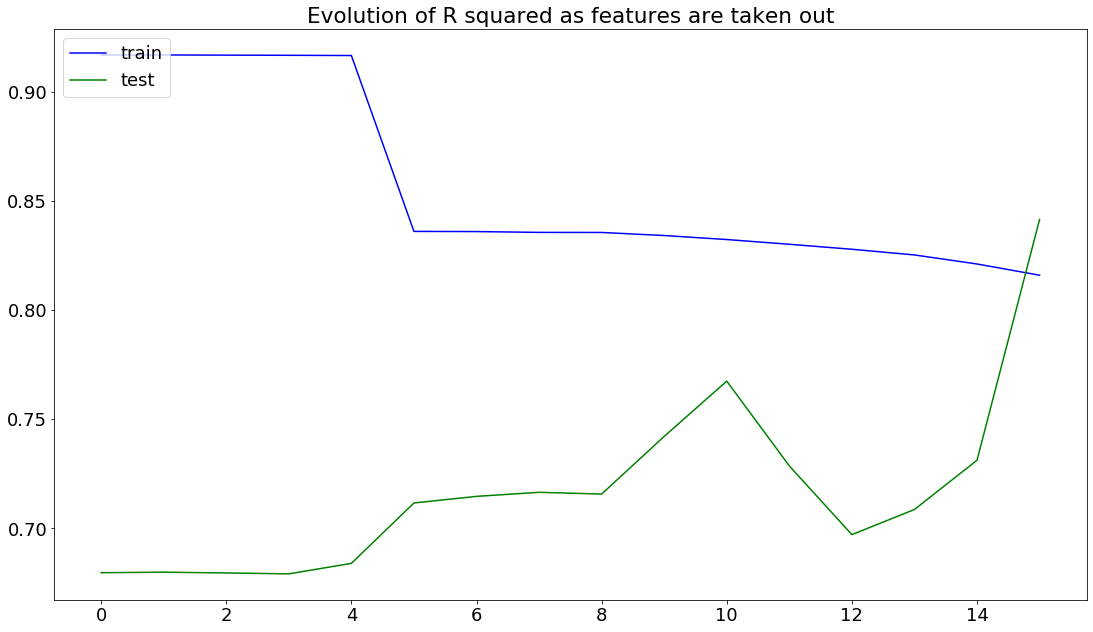

In [125]:
plot.plot( r2_train_array, 'b', label='train')
plot.plot( r2_test_array, 'g', label='test')
plot.title('Evolution of R squared as features are taken out')
plot.legend(loc="upper left")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


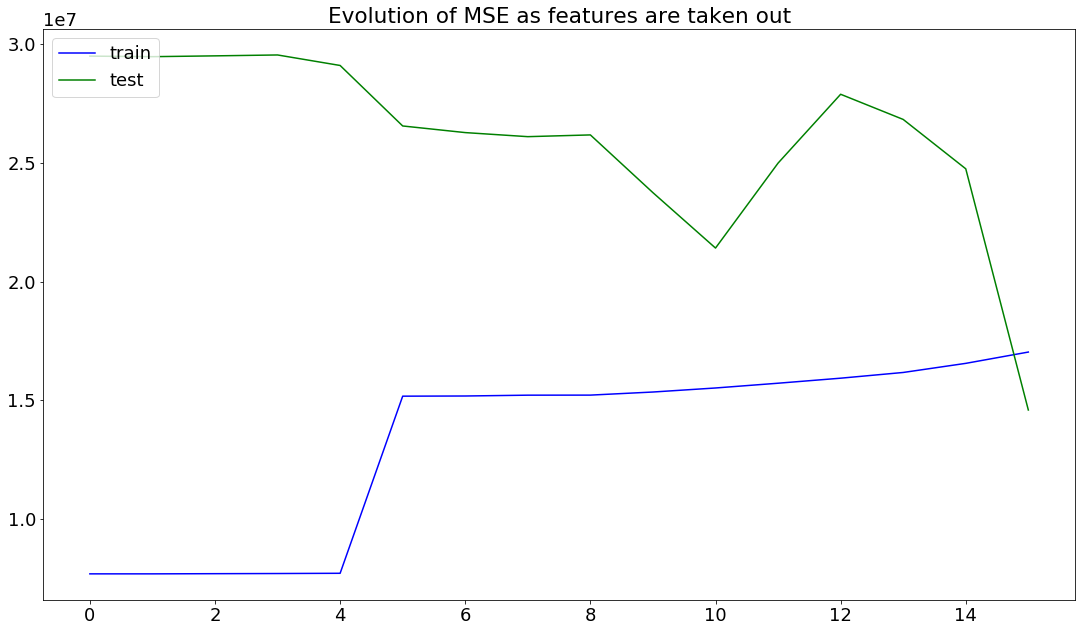

In [126]:
plot.plot( mse_train_array, 'b', label='train')
plot.plot( mse_test_array, 'g', label='test')
plot.title('Evolution of MSE as features are taken out')
plot.legend(loc="upper left")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)


# Verifying assumptions of linear model


In [127]:
y_pred=model.predict(X_test)
y_pred_train=model.predict(X_train)
residuals=y_test-y_pred
residuals_train=y_train-y_pred_train

(0.9632355570793152, 0.2699606716632843)

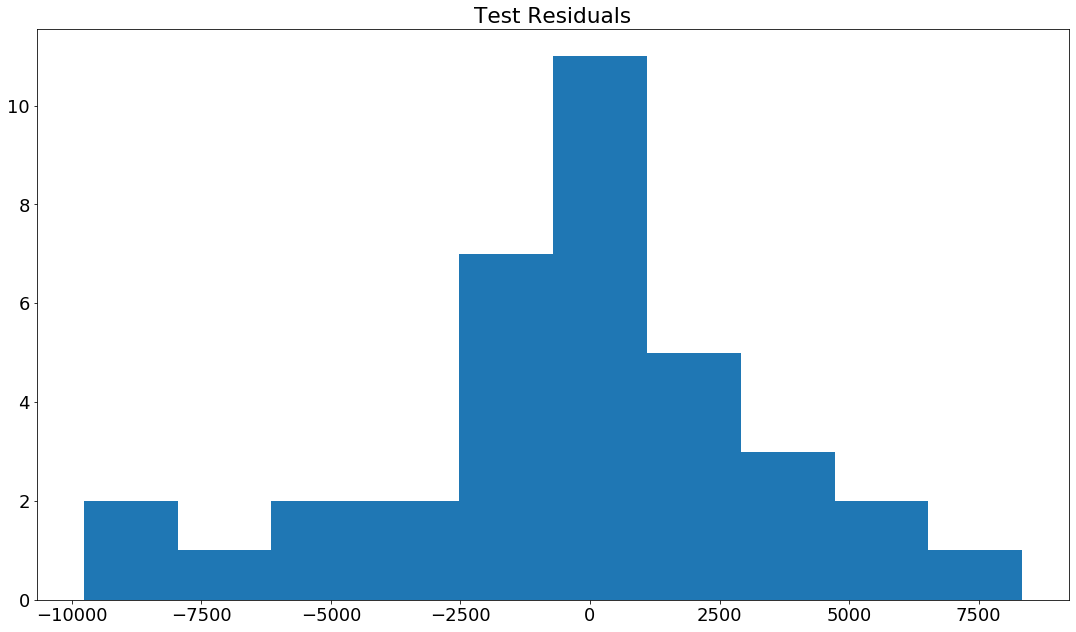

In [128]:
residuals=y_test-y_pred

plot.hist(residuals,bins=10)
plot.title("Test Residuals")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
stats.shapiro(residuals)

(0.9441866874694824, 1.8393313894193852e-06)

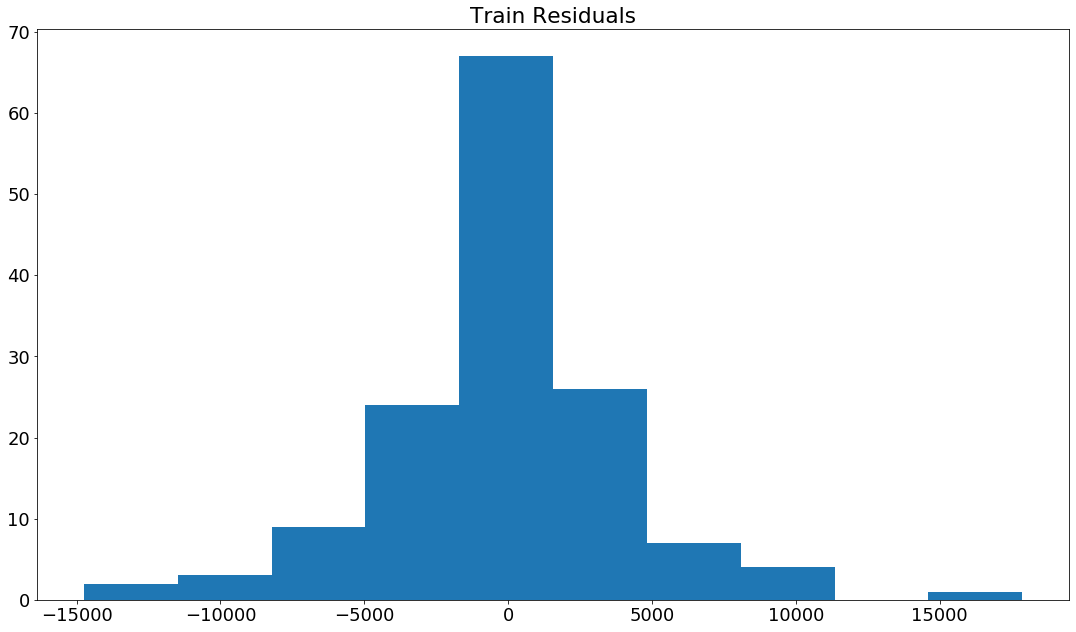

In [129]:
plot.hist(residuals_train,bins=10)
plot.title("Train Residuals")
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
stats.shapiro(residuals_train.append(residuals))

(0.9441866874694824, 1.8393313894193852e-06)

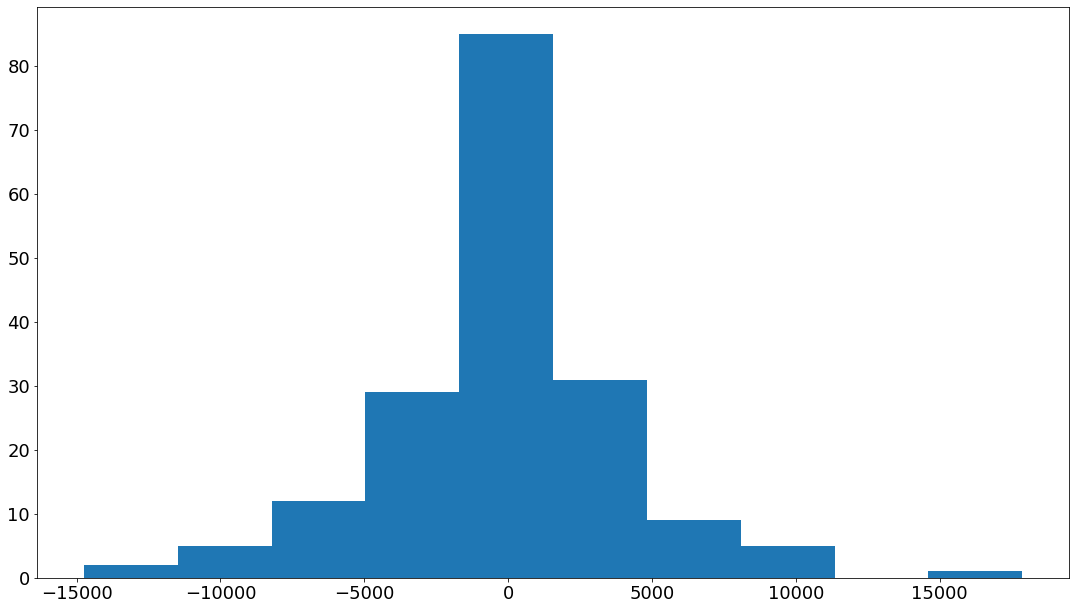

In [130]:
plot.hist(residuals_train.append(residuals),bins=10)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
stats.shapiro(residuals_train.append(residuals))

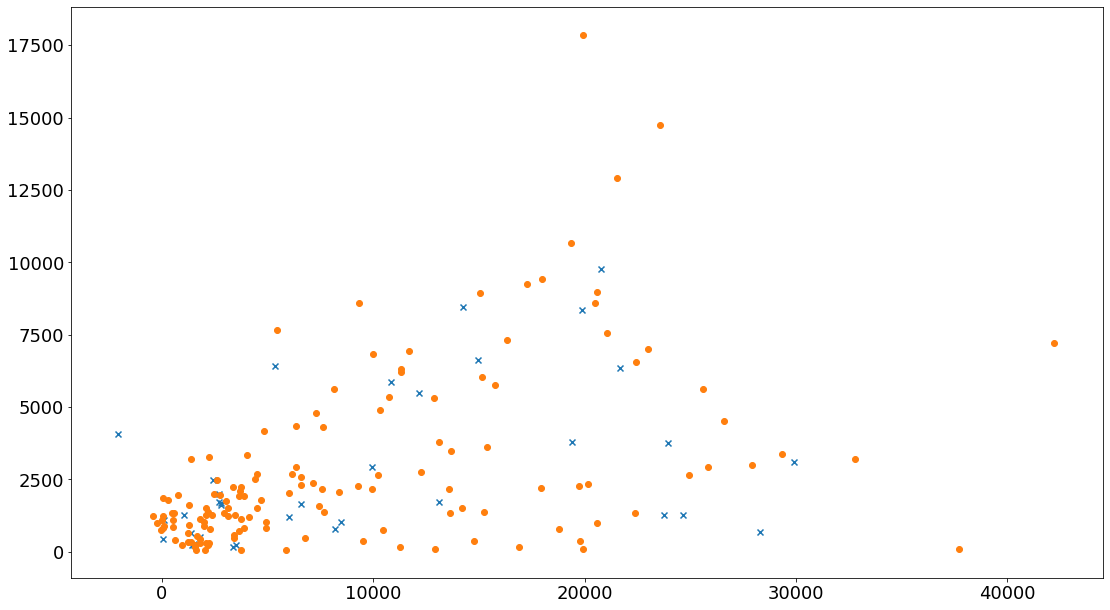

In [131]:
absolute_residuals=np.absolute(residuals)
absolute_train_residuals=np.absolute(residuals_train)
fig,ax=plot.subplots(figsize=(18.5,10.5))
ax.scatter(y_pred,absolute_residuals, marker='x')
ax.scatter(y_pred_train,absolute_train_residuals,marker='o')